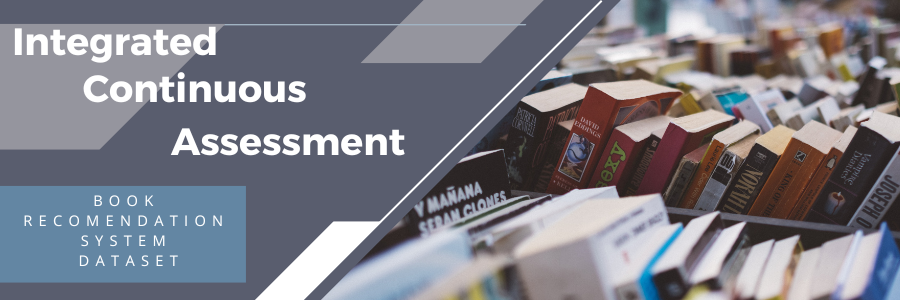

# Introduction

# Part I. Content and Collaborative Filtering

The dataset chosen to perform part I of the project, which corresponds to collaborative and content filtering, is the 'Book Crossing' dataset (1). This dataset was collected by Cai-Nicolas Ziegler in a 4-week crawl (from August to September 2004) from the Book -Crossing community, it contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books. The BookCrossing community is a website that allows people to share their books by leaving them in public places for other people to find and read. The community keeps track of the books' journeys as they are passed from reader to reader. 

3 tables are part of the Book-Crossing dataset:

* BX-Users witch it's the table that contains the users information (confidential data). You get user's Id's and also location (city, state and country). 
* BX-Books, this table contains books ISBN, book title's, author and publisher's. All this information obtained from Amazon Web Services.
* BX-Book-Ratings, this table contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

So let's take a look how this methods can help users of the book crossing community:


# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# 2. Importing Datasets and Data Cleaning

## 2.1 'Ratings' Dataset

In [2]:
ratings_df = pd.read_csv ("BX-Book-Ratings.csv", sep=';', error_bad_lines=False, encoding='latin-1')

In [3]:
ratings_df. shape

(1149780, 3)

Ratings table contain more than 1 million data records and 3 features, let's find one what information this features contains.

In [4]:
ratings_df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


We have user's Id's, Books ISBN and the book ratings, we already know thanks to data dictionary that 'Book-Rating' feature are either explicit (1-10) or implicit (0).

In [5]:
ratings_df.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


'User-ID' and 'Book-Rating' are both numerical features and ISBN as we know it's a unique identifier assigned to books, so this value carry between 10 or 13 digits long and can carry numbers and letters, so that's the reason why it's cataloged as a categorical feature. 

**Rating Dataset Missing Values**

In [6]:
ratings_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

No missing values in 'Ratings' table. Let's explore each one of the features in 'Ratings' dataset, let's begin with 'User-ID'.

**Exploring 'User ID' Feature**

In [7]:
ratings_df["User-ID"].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: User-ID, Length: 105283, dtype: int64

By running ".value_counts()" function we get the count of number of occurrences of each unique value in the "User-ID" column. Top 3 users of the platform are: 11676, 198711 and 153662 .

**Exploring ISBN feature**

In [8]:
ratings_df["ISBN"].value_counts()

0971880107     2502
0316666343     1295
0385504209      883
0060928336      732
0312195516      723
               ... 
1568656386        1
1568656408        1
1569551553        1
1570081808        1
05162443314       1
Name: ISBN, Length: 340556, dtype: int64

"The International Standard Book Number (ISBN) is a 13-digit number that uniquely identifies books and book-like products published internationally." (1)  It is a unique identifier assigned to each edition and variation of a book. The purpose of the ISBN is to provide a standardized way to identify books and facilitate their distribution and cataloging. 
By using ".value_counts()" function
'ISBN' it's a unique code that books have, in this case it seems that some books are more popular than others because the 'ISBN' are repeating, so this means that more people are interested in reading certain books since som ISBN are repeating so many times. 

**Exploring Book Rating feature**

In [9]:
ratings_df["Book-Rating"].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

Books Ratings goes from 0 to 10, so that means that some users are not rating books that are reading. 

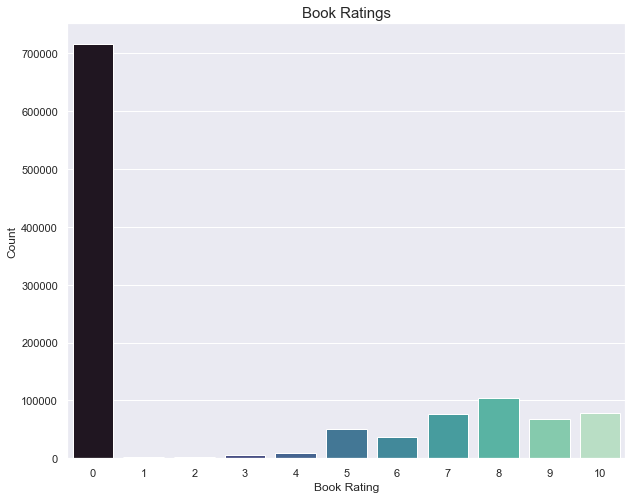

In [10]:
rating_counts = ratings_df["Book-Rating"].value_counts()
colors = sns.color_palette("mako", len(rating_counts))
sns.set(style="darkgrid") 
plt.figure(figsize=(10, 8)) 
sns.barplot(x=rating_counts.index, y=rating_counts, palette=colors)
plt.xlabel("Book Rating")
plt.ylabel("Count") 
plt.title("Book Ratings", fontsize = 15)
plt.show()  

After plotting a graphic, you can tell that the implicit rating (in this case 0) has the biggest values, most of time people are not rating the books that are reading and crossing. The people that it's rating the books (1-10) are giving good ratings to the books that are reading between 7 and 10. 

## 2.2 'Books' Dataset

In [11]:
books_df = pd.read_csv ("BX-Books.csv", sep=';', error_bad_lines=False, encoding='latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [12]:
books_df.shape

(271360, 8)

The books table has more than 270.000 data records and 8 features, it can be considered a large dataset. 

In [13]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [14]:
books_df.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

All the features are categorical values.

In [15]:
books_df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


Just as the Rating table, the books table also has a ISBN feature, this feature can be the key to merge, rating and book table together. 

**Checking missing values in 'Books' Dataset**

In [16]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Only 6 missing values in this dataset. 

**Exploring 'ISBN' feature** 

In [17]:
books_df["ISBN"].value_counts()

0195153448    1
0746008481    1
0395219906    1
043916169X    1
0879235322    1
             ..
1568303823    1
0525947612    1
207036819X    1
2877306127    1
0767409752    1
Name: ISBN, Length: 271360, dtype: int64

In [18]:
print(books_df["ISBN"].duplicated().sum())

0


We have no duplicate data in the 'ISBN' feature of books dataset. 

**Exploring 'Book Title' feature**

In [19]:
print(books_df["Book-Title"].duplicated().sum())

29225


We have duplicate data in 'Book Title' feature, let's explore a little about it. 

In [20]:
books_df["Book-Title"].value_counts()

Selected Poems                                                                                                                    27
Little Women                                                                                                                      24
Wuthering Heights                                                                                                                 21
The Secret Garden                                                                                                                 20
Dracula                                                                                                                           20
                                                                                                                                  ..
What Every Kid Should Know                                                                                                         1
The Seventh Enemy (A Brady Coyne Mystery)                            

Let's check the top 3 'Book Title', Top 3 Books are repeated more than 20 times. 

In [21]:
books_df[books_df["Book-Title"] == 'Selected Poems'] 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
4523,081120958X,Selected Poems,William Carlos Williams,1985,New Directions Publishing Corporation,http://images.amazon.com/images/P/081120958X.0...,http://images.amazon.com/images/P/081120958X.0...,http://images.amazon.com/images/P/081120958X.0...
39416,0811201465,Selected Poems,K. Patchen,1957,New Directions Publishing Corporation,http://images.amazon.com/images/P/0811201465.0...,http://images.amazon.com/images/P/0811201465.0...,http://images.amazon.com/images/P/0811201465.0...
41316,0679750800,Selected Poems,Rita Dove,1993,Vintage Books USA,http://images.amazon.com/images/P/0679750800.0...,http://images.amazon.com/images/P/0679750800.0...,http://images.amazon.com/images/P/0679750800.0...
106885,0060931744,Selected Poems,Gwendolyn Brooks,1999,Perennial,http://images.amazon.com/images/P/0060931744.0...,http://images.amazon.com/images/P/0060931744.0...,http://images.amazon.com/images/P/0060931744.0...
118775,0517101548,Selected Poems,John Donne,1994,Gramercy Books,http://images.amazon.com/images/P/0517101548.0...,http://images.amazon.com/images/P/0517101548.0...,http://images.amazon.com/images/P/0517101548.0...
127462,0520012984,Selected Poems,Paul Verlaine,1970,University of California Press,http://images.amazon.com/images/P/0520012984.0...,http://images.amazon.com/images/P/0520012984.0...,http://images.amazon.com/images/P/0520012984.0...
156894,0871401541,Selected Poems,E. E. Cummings,1994,Liveright Publishing Corporation,http://images.amazon.com/images/P/0871401541.0...,http://images.amazon.com/images/P/0871401541.0...,http://images.amazon.com/images/P/0871401541.0...
158312,0060909897,Selected Poems,Gwendolyn Brooks,1963,Harpercollins,http://images.amazon.com/images/P/0060909897.0...,http://images.amazon.com/images/P/0060909897.0...,http://images.amazon.com/images/P/0060909897.0...
175602,0571050190,Selected Poems,T. T Gunn,1962,Farrar Straus &amp; Giroux,http://images.amazon.com/images/P/0571050190.0...,http://images.amazon.com/images/P/0571050190.0...,http://images.amazon.com/images/P/0571050190.0...
183908,1550651498,Selected Poems,Ralph Gustafson,2001,Vehicule Press,http://images.amazon.com/images/P/1550651498.0...,http://images.amazon.com/images/P/1550651498.0...,http://images.amazon.com/images/P/1550651498.0...


Most of them same book title but different authors. 

In [22]:
books_df[books_df["Book-Title"] == 'Little Women'] 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
3952,185854176X,Little Women,Louisa M. Atcott,1995,Brimax Books Ltd,http://images.amazon.com/images/P/185854176X.0...,http://images.amazon.com/images/P/185854176X.0...,http://images.amazon.com/images/P/185854176X.0...
4330,0861782356,Little Women,Louisa May Alcott,0,Octopus Publising Group Plc,http://images.amazon.com/images/P/0861782356.0...,http://images.amazon.com/images/P/0861782356.0...,http://images.amazon.com/images/P/0861782356.0...
12227,0590203509,Little Women,Louisa May Alcott,1994,Scholastic,http://images.amazon.com/images/P/0590203509.0...,http://images.amazon.com/images/P/0590203509.0...,http://images.amazon.com/images/P/0590203509.0...
20676,0440447682,Little Women,Louisa May Alcott,1990,Yearling Books,http://images.amazon.com/images/P/0440447682.0...,http://images.amazon.com/images/P/0440447682.0...,http://images.amazon.com/images/P/0440447682.0...
32837,1550134140,Little Women,Louisa May Alcott,0,Firefly Books Ltd,http://images.amazon.com/images/P/1550134140.0...,http://images.amazon.com/images/P/1550134140.0...,http://images.amazon.com/images/P/1550134140.0...
52210,0451529308,Little Women,Louisa May Alcott,2004,Signet Classics,http://images.amazon.com/images/P/0451529308.0...,http://images.amazon.com/images/P/0451529308.0...,http://images.amazon.com/images/P/0451529308.0...
52551,0451518144,Little Women,Louisa May Alcott,1983,Signet Book,http://images.amazon.com/images/P/0451518144.0...,http://images.amazon.com/images/P/0451518144.0...,http://images.amazon.com/images/P/0451518144.0...
53358,0590437976,Little Women,Louisa May Alcott,1992,Scholastic,http://images.amazon.com/images/P/0590437976.0...,http://images.amazon.com/images/P/0590437976.0...,http://images.amazon.com/images/P/0590437976.0...
57432,0195813898,Little Women,Alcott,1985,Oxford University Press,http://images.amazon.com/images/P/0195813898.0...,http://images.amazon.com/images/P/0195813898.0...,http://images.amazon.com/images/P/0195813898.0...
72168,0785788727,Little Women,Louisa May Alcott,1999,Sagebrush Bound,http://images.amazon.com/images/P/0785788727.0...,http://images.amazon.com/images/P/0785788727.0...,http://images.amazon.com/images/P/0785788727.0...


In [23]:
books_df[books_df["Book-Title"] == 'Wuthering Heights'] 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
993,0553212583,Wuthering Heights,EMILY BRONTE,1983,Bantam,http://images.amazon.com/images/P/0553212583.0...,http://images.amazon.com/images/P/0553212583.0...,http://images.amazon.com/images/P/0553212583.0...
1050,0553211412,Wuthering Heights,Emily Bronte,1983,Bantam,http://images.amazon.com/images/P/0553211412.0...,http://images.amazon.com/images/P/0553211412.0...,http://images.amazon.com/images/P/0553211412.0...
2075,0812505166,Wuthering Heights,Emily Bronte,1989,Tor Classics,http://images.amazon.com/images/P/0812505166.0...,http://images.amazon.com/images/P/0812505166.0...,http://images.amazon.com/images/P/0812505166.0...
11120,0553210211,Wuthering Heights,Emily Bronte,1981,Bantam Books,http://images.amazon.com/images/P/0553210211.0...,http://images.amazon.com/images/P/0553210211.0...,http://images.amazon.com/images/P/0553210211.0...
12735,0439228913,Wuthering Heights,Emily Bronte,2003,Scholastic Paperbacks,http://images.amazon.com/images/P/0439228913.0...,http://images.amazon.com/images/P/0439228913.0...,http://images.amazon.com/images/P/0439228913.0...
13684,1566193087,Wuthering Heights,Emily Bronte,1994,Dorset Press,http://images.amazon.com/images/P/1566193087.0...,http://images.amazon.com/images/P/1566193087.0...,http://images.amazon.com/images/P/1566193087.0...
27658,0590460307,Wuthering Heights,Emily Bronte,1992,Scholastic Paperbacks (Mm),http://images.amazon.com/images/P/0590460307.0...,http://images.amazon.com/images/P/0590460307.0...,http://images.amazon.com/images/P/0590460307.0...
29712,0140171002,Wuthering Heights,Emily Bronte,1992,Penguin Books Ltd,http://images.amazon.com/images/P/0140171002.0...,http://images.amazon.com/images/P/0140171002.0...,http://images.amazon.com/images/P/0140171002.0...
41500,0880299185,Wuthering Heights,Emily Bronte,1992,Barnes &amp; Noble,http://images.amazon.com/images/P/0880299185.0...,http://images.amazon.com/images/P/0880299185.0...,http://images.amazon.com/images/P/0880299185.0...
63570,0451519582,Wuthering Heights,Emily Bronte,1959,Signet Book,http://images.amazon.com/images/P/0451519582.0...,http://images.amazon.com/images/P/0451519582.0...,http://images.amazon.com/images/P/0451519582.0...


'Little Women' and 'Wuthering Heights' in both cases are about the same book, but with different publishers and different year of publication, also different ISBN, so no duplicated data here. 

**Exploring 'Book Author' feature**

In 'Book Author' have one missing value, let's take a look. 

In [24]:
books_df.loc[(books_df['Book-Author'].isnull()),: ]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In this particular case, I just going to fill that missing value with 'Unknow' author. 

In [25]:
books_df['Book-Author'].fillna('Unknown', inplace=True)
books_df['Book-Author'].isna().sum()

0

No more mising values in 'Book-Author' feature.

**Exploring 'Year of Publication' feature**

In [26]:
books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In this case, we can see we have categorical values in the 'year of publication' feature that it's supposed to be numerical data. Let's explore about that data record rows with categorical values. 

In [27]:
books_df[books_df['Year-Of-Publication'] == 'DK Publishing Inc'] 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [28]:
books_df[books_df['Year-Of-Publication'] == 'Gallimard'] 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In both cases, is a typing error, what should be in the year of publication is in the author feature and what is in book author should be in the year of publication. Let's visualize all the data in these particular rows. 

In [29]:
pd.set_option('display.max_colwidth', None)
books_df.loc[209538]

ISBN                                                                                                             078946697X
Book-Title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"
Book-Author                                                                                                            2000
Year-Of-Publication                                                                                       DK Publishing Inc
Publisher                                                      http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
Image-URL-S                                                    http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg
Image-URL-M                                                    http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg
Image-URL-L                                                                                                             NaN
Name: 20

In [30]:
books_df.loc[221678]

ISBN                                                                                                                    0789466953
Book-Title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"
Book-Author                                                                                                                   2000
Year-Of-Publication                                                                                              DK Publishing Inc
Publisher                                                             http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg
Image-URL-S                                                           http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg
Image-URL-M                                                           http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg
Image-URL-L                                                                        

In [31]:
books_df.loc[220731]

ISBN                                                                                 2070426769
Book-Title             Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"
Book-Author                                                                                2003
Year-Of-Publication                                                                   Gallimard
Publisher                          http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg
Image-URL-S                        http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg
Image-URL-M                        http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg
Image-URL-L                                                                                 NaN
Name: 220731, dtype: object

It's time to replace the correct values.

In [32]:
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df.head(2)

In [33]:
#Replacing values of column 209538
replace_df_value(books_df, 209538, 'Book-Title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(books_df, 209538, 'Book-Author', 'Michael Teitelbaum')
replace_df_value(books_df, 209538, 'Year-Of-Publication', 2000)
replace_df_value(books_df, 209538, 'Publisher', 'DK Publishing Inc')

#Replacing values of column 221678
replace_df_value(books_df, 221678, 'Book-Title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(books_df, 221678, 'Book-Author', 'James Buckley')
replace_df_value(books_df, 221678, 'Year-Of-Publication', 2000)
replace_df_value(books_df, 221678, 'Publisher', 'DK Publishing Inc')

#Replacing values of column 220731
replace_df_value(books_df, 220731,'Book-Title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(books_df, 220731, 'Book-Author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(books_df, 220731, 'Year-Of-Publication', 2003)
replace_df_value(books_df, 220731, 'Publisher', 'Gallimard')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg


Using the unique function before hand, I could see we also have "0" in the year of publication. 

In [34]:
books_df[books_df['Year-Of-Publication'] == '0']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
196656,3442035368,Ich Gestehe,Heinz G. Konsalik,0,Wilhelm Goldmann Verlag GmbH,http://images.amazon.com/images/P/3442035368.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/3442035368.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/3442035368.01.LZZZZZZZ.jpg
196678,0553124803,Being There,Jerzy Kosinski,0,Bantam Doubleday Dell,http://images.amazon.com/images/P/0553124803.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0553124803.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0553124803.01.LZZZZZZZ.jpg
196680,888274387X,Vaniglia E Cioccolato,Modignani Casati,0,Sperling Paperback,http://images.amazon.com/images/P/888274387X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/888274387X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/888274387X.01.LZZZZZZZ.jpg
196685,033368155X,Surreal Lives the Surrealists 1945,Ruth Brandon,0,Humanity Press/prometheus Bk,http://images.amazon.com/images/P/033368155X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/033368155X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/033368155X.01.LZZZZZZZ.jpg
196734,0207158452,Games of the Strong,Glenda Adams,0,Harpercollins Publisher,http://images.amazon.com/images/P/0207158452.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0207158452.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0207158452.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...
261929,0760700702,100 Great Archaeological Discoveries,Paul G Bahn,0,Barnes Noble Inc,http://images.amazon.com/images/P/0760700702.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0760700702.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0760700702.01.LZZZZZZZ.jpg
261930,0760701962,UFO's: A Scientific Debate,Carl Sagan,0,Barnes Noble Books,http://images.amazon.com/images/P/0760701962.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0760701962.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0760701962.01.LZZZZZZZ.jpg
261931,0760706379,Only Way to Cross,John Maxtone Graham,0,Barnes Noble,http://images.amazon.com/images/P/0760706379.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0760706379.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0760706379.01.LZZZZZZZ.jpg
262120,0880292288,New York Times Guide to Reference Materials,Mona Mccormick,0,Dorset House Publishing Co Inc,http://images.amazon.com/images/P/0880292288.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0880292288.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0880292288.01.LZZZZZZZ.jpg


Let's take a look at some specific data records I realize we have using the 'unique' function , there are some books with "strange" years of publication like: 1376, 2030 or 2037...

In [35]:
books_df[books_df['Year-Of-Publication'] == '1376'] 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.LZZZZZZZ.jpg


In this case, it can be a historical book.

In [36]:
books_df[books_df['Year-Of-Publication'] == '2030'] 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
228173,0671266500,FOREST PEOPLE (Touchstone Books (Hardcover)),Colin M. Turnbull,2030,Simon &amp; Schuster,http://images.amazon.com/images/P/0671266500.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0671266500.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0671266500.01.LZZZZZZZ.jpg
240169,0684718022,In Our Time: Stories (Scribner Classic),Ernest Hemingway,2030,Collier Books,http://images.amazon.com/images/P/0684718022.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0684718022.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0684718022.01.LZZZZZZZ.jpg
260974,0671740989,FOOTBALL SUPER TEAMS : FOOTBALL SUPER TEAMS,Bill Gutman,2030,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0671740989.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0671740989.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0671740989.01.LZZZZZZZ.jpg


In [37]:
books_df[books_df['Year-Of-Publication'] == '2037'] 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
255409,068471809X,To Have and Have Not,Ernest Hemingway,2037,Simon &amp; Schuster,http://images.amazon.com/images/P/068471809X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/068471809X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/068471809X.01.LZZZZZZZ.jpg


In this other cases 2030 and 2037 I believe it was a mistake, I check on the internet with the 'ISBN' number and these are books published in years like 1961 and years like 1937, so maybe a tipyng mistake. 

'Years of publication' it's a categorical value in this dataset, so let's turn this feature in a numerical feature.

In [38]:
books_df["Year-Of-Publication"] = pd.to_numeric(books_df["Year-Of-Publication"], errors='coerce')

Also this dataset was collected in a 4-week crawl (August / September 2004) according to the source. We have some years of publication, set in the feature (years fater 2004), let's turn all this data in missing values, so they can be replace later. All the 'year of publication' set to "0" will aslo be replace with missing values. 

So because this dataset was collected in 2004, all the 'Year-Of-Publication' that are greater than 2004  or 0 will be turn into missinga values. 

In [39]:
books_df["Year-Of-Publication"] = np.where(books_df["Year-Of-Publication"] > 2004, np.nan, books_df["Year-Of-Publication"])
books_df['Year-Of-Publication'].replace(0, np.nan, inplace=True)

In [40]:
books_df['Year-Of-Publication'].isna().sum()

4690

Now the missing values in 'year of publication' it's 4690.

In [41]:
books_df['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984.,   nan, 1968., 1961., 1958., 1974., 1976., 1971., 1977.,
       1975., 1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966.,
       1920., 1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969.,
       1954., 1950., 1967., 1957., 1940., 1937., 1955., 1946., 1936.,
       1930., 1925., 1948., 1943., 1947., 1945., 1923., 1939., 1926.,
       1938., 1911., 1904., 1949., 1932., 1928., 1929., 1927., 1931.,
       1914., 1934., 1910., 1933., 1902., 1924., 1921., 1900., 1944.,
       1917., 1901., 1908., 1906., 1935., 1806., 1909., 1378., 1919.,
       1922., 1897., 1376.])

But now all the 'Year-Of-Publication' from the data records are standard data. 

Before replacing missing values, I want to check how's the distribution of this feature.

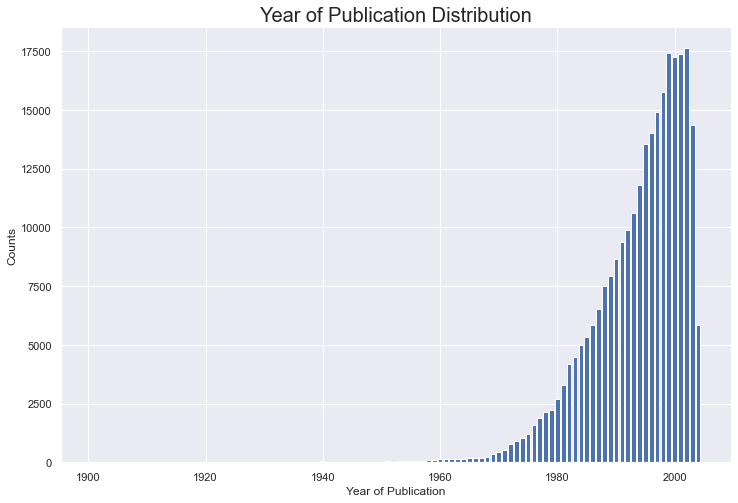

In [42]:
year_distr = books_df['Year-Of-Publication'].value_counts().sort_index()
year_distr = year_distr.where(year_distr>5) 
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 15}) 
plt.bar(year_distr.index, year_distr.values)
plt.title('Year of Publication Distribution', fontsize=20)
plt.xlabel('Year of Publication', fontsize = 12)
plt.ylabel('Counts',  fontsize = 12)
plt.show()

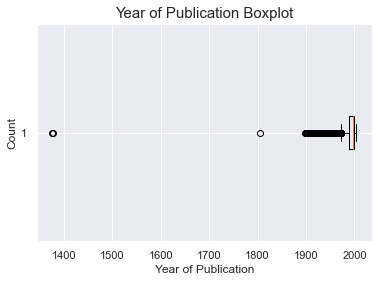

In [43]:
plt.boxplot(books_df["Year-Of-Publication"].dropna(), vert=False)
plt.title("Year of Publication Boxplot", fontsize = 15)
plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.show()

This feature has a lot of outliers and also the distribution it's a little skew, so my decision will be to replace the missinga values with the median. The median is less sensitive to such outliers and provides a measure that represents the central tendency of the data in a more robust manner unlike the mean. 

In [44]:
books_df['Year-Of-Publication'].fillna((books_df['Year-Of-Publication'].median()), inplace=True)

In [45]:
books_df['Year-Of-Publication'].isna().sum()

0

No missing values in 'Year-Of-Publication' feature.

**Exploring 'Publisher' feature**

We have 2 missing values in 'Publisher' feature. Let's take a look.

In [46]:
books_df.loc[(books_df['Publisher'].isnull()),: ]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


I decided to fill that missing values with 'Unknow' publisher.

In [47]:
books_df['Publisher'].fillna('Unknown', inplace=True)
books_df['Publisher'].isna().sum()

0

In [48]:
books_df['Publisher'].value_counts()

Harlequin                  7535
Silhouette                 4220
Pocket                     3905
Ballantine Books           3783
Bantam Books               3646
                           ... 
Polaris Books                 1
Hannover House                1
Amber Quill Press, LLC.       1
Lunchbox Press                1
Connaught                     1
Name: Publisher, Length: 16804, dtype: int64

**Dropping unnecesary features**

I decided to drop the next features 'Image-URL-S', 'Image-URL-M', 'Image-URL-L', I considered unnecesary and don't contribute anything to my analysis. 

In [49]:
books_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company


In [50]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

No missing values in Books dataset. 

## 2.3 'Users' Dataset

In [51]:
users_df = pd.read_csv ("BX-Users.csv", sep=';', error_bad_lines=False, encoding='latin-1')

In [52]:
users_df.shape

(278858, 3)

In [53]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [54]:
users_df.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


Users table, has only 3 features that contains information about the users that use the book crossing platform. It has more than 250.000 data records. 

**Checking Missing Values**

In [55]:
users_df.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [56]:
users_df.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

No missing values in this dataset and the features include categorical and numeric data. 

**Exploring 'User ID' feature**

In [57]:
users_df['User-ID'].value_counts()

1         1
185904    1
185910    1
185909    1
185908    1
         ..
92959     1
92960     1
92961     1
92962     1
278858    1
Name: User-ID, Length: 278858, dtype: int64

As far as we know, all the information include here it's from different users, none of them repeat more than once. 

In [58]:
print(users_df["User-ID"].duplicated().sum())

0


It seems no duplicated data in 'User ID' feature.

**Exploring 'Location' feature**

In [59]:
users_df['Location'].value_counts()

london, england, united kingdom                  2506
toronto, ontario, canada                         2250
sydney, new south wales, australia               1744
melbourne, victoria, australia                   1708
portland, oregon, usa                            1629
                                                 ... 
gneisenaustr. 3, nordrhein-westfalen, germany       1
-, bayern, germany                                  1
bouchegouf, guelma, algeria                         1
indiana and philadelphia, pennsylvania, usa         1
tacoma, washington, united kingdom                  1
Name: Location, Length: 57339, dtype: int64

It seems all location (cities, counties/state/province) are together, I'm going to separate all this information in independent features, so we can explore a little bit more about locations. 

In [60]:
location_feature = users_df.Location.str.split(',', 2, expand=True)
location_feature.columns = ['City', 'State', 'Country']
users_df= users_df.join(location_feature)

Splitting 'Location' feature into: city, state and country features and dropping 'Location' feature.

In [61]:
users_df.drop(columns=['Location'], inplace=True)
users_df.head()

,User-ID,Age,City,State,Country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


In [62]:
users_df.isna().sum()

User-ID         0
Age        110762
City            0
State           1
Country         2
dtype: int64

Lots of missing values in 'Age' feature. 

**Exploring 'City' feature**

We already know that 'City' feature has no missing values, let's check if it has empty spaces in this feature or "0"

In [63]:
users_df["City"].value_counts()

london          4105
barcelona       2664
toronto         2342
madrid          1933
sydney          1884
                ... 
mouzillon          1
el reno            1
llandyfaelog       1
colwich            1
stranraer          1
Name: City, Length: 32770, dtype: int64

In [64]:
users_df[users_df['City'] == '']

,User-ID,Age,City,State,Country
4968,4969,30.0,,,
8340,8341,NaN,,,portugal
9395,9396,44.0,,,
10786,10787,NaN,,,ireland
11852,11853,NaN,,,singapore
...,...,...,...,...,...
263613,263614,46.0,,,united kingdom
265540,265541,24.0,,,
271089,271090,24.0,,arizona,usa
273607,273608,NaN,,,


Replacing all the blank spaces in 'City' feature into missing values.

In [65]:
users_df['City'].replace('', np.nan, inplace=True)
users_df['City'].isna().sum()

122

Checking if this feature already has like a unknown or n/a value. 

In [66]:
users_df[users_df['City'] == 'n/a']

,User-ID,Age,City,State,Country
64,65,NaN,n/a,n/a,australia
1372,1373,NaN,n/a,n/a,lesotho
2064,2065,16.0,n/a,n/a,singapore
2196,2197,26.0,n/a,travelling,canada
2759,2760,23.0,n/a,aargau,switzerland
...,...,...,...,...,...
277127,277128,19.0,n/a,st andrew`s,guernsey
277419,277420,56.0,n/a,n/a,united kingdom
277706,277707,NaN,n/a,n/a,united kingdom
277849,277850,NaN,n/a,bkk,bkk


In [67]:
users_df[users_df['City'] == 'unknown']

,User-ID,Age,City,State,Country
45948,45949,NaN,unknown,hawaii,usa
48420,48421,NaN,unknown,massachusetts,usa
58969,58970,NaN,unknown,massachusetts,usa
77625,77626,16.0,unknown,oregon,usa
127979,127980,NaN,unknown,england,united kingdom
214850,214851,NaN,unknown,unknown,usa
237292,237293,NaN,unknown,unknown,unknown
244555,244556,25.0,unknown,louisiana,usa
247350,247351,NaN,unknown,unknown,italy


It has invalid (n/a) values and 'unknown' values. 

In [68]:
users_df['City'].replace('n/a', np.nan, inplace=True)
users_df['City'].isna().sum()

561

Replacing all the invalid data into missing values and filling all the missing values in 'City' feature as 'unknow' data. 

In [69]:
users_df['City'].fillna('unknown', inplace=True)
users_df['City'].isna().sum()

0

**Exploring 'State' feature**

I will repeat the same procedure that i did with 'City' feature.

In [70]:
users_df["State"].value_counts()

 california             19898
 n/a                    12527
 england                10691
 ontario                 8736
 texas                   8392
                        ...  
 prato                      1
 dr.                        1
 edo de mexico              1
 západné slovensko          1
 denbighshire county        1
Name: State, Length: 6334, dtype: int64

I can see they have a data record with "n/a", let's calculate the missing values. 

In [71]:
users_df["State"].isna().sum()

1

In [72]:
users_df[users_df['State'] ==' n/a']

,User-ID,Age,City,State,Country
30,31,20.0,shanghai,n/a,china
36,37,23.0,san sebastian,n/a,spain
44,45,NaN,berlin,n/a,germany
64,65,NaN,unknown,n/a,australia
73,74,30.0,amsterdam,n/a,netherlands
...,...,...,...,...,...
278781,278782,NaN,larnaca,n/a,cyprus
278787,278788,NaN,zuerich,n/a,switzerland
278807,278808,43.0,esplugas de llobregat,n/a,spain
278852,278853,17.0,stranraer,n/a,united kingdom


In [73]:
users_df[users_df['State'] ==' unknown']

,User-ID,Age,City,State,Country
180266,180267,NaN,the hague,unknown,netherlands
214850,214851,NaN,unknown,unknown,usa
237292,237293,NaN,unknown,unknown,unknown
247350,247351,NaN,unknown,unknown,italy
262269,262270,NaN,weisbaden aaf,unknown,germany


Let's replaces this 'n/a' values as missing values.

In [74]:
users_df['State'].replace(' n/a', np.nan, inplace=True)
users_df['State'].isna().sum()

12528

Checking for empty data records in 'State' feature. 

In [75]:
users_df[users_df['State'] == '']

,User-ID,Age,City,State,Country
2238,2239,25.0,deep river,,"connecticut, usa"
4468,4469,36.0,guadalajara,,"jalisco, mexico, mexico"
5412,5413,54.0,ranfurly,,"central otago, new zealand"
5998,5999,NaN,victoria,,"british columbia, canada"
6737,6738,69.0,south portland,,"maine, usa"
...,...,...,...,...,...
272215,272216,NaN,hedgesville,,"west virginia, usa"
272881,272882,50.0,silver spring,,"maryland, usa"
275021,275022,NaN,berkeley,,"california, usa"
275654,275655,19.0,xiongcountry,,"hebei, china"


Replacing empty data records as missing values. 

In [76]:
users_df['State'].replace('', np.nan, inplace=True)
users_df['State'].isna().sum()

12780

Filling missing values as unknown category.

In [77]:
users_df['State'].fillna('unknown', inplace=True)
users_df['State'].isna().sum()

0

**Exploring 'Country' feature**

Repeating same procedure with 'Country' feature. 

In [78]:
users_df["Country"].isna().sum()

2

In [79]:
users_df["Country"].value_counts()

 usa                           139183
 canada                         21556
 united kingdom                 18286
 germany                        17021
 spain                          13088
                                ...  
 republic of panama, panama         1
 co. kilkenny, ireland              1
 edo. de mexico, mexico             1
 02458                              1
 united kingdom.                    1
Name: Country, Length: 1276, dtype: int64

In [80]:
users_df[users_df['Country'] == '']

,User-ID,Age,City,State,Country
18,19,14.0,weston,,
90,91,NaN,toronto/newmarket,,
311,312,NaN,lk,jlk,
317,318,NaN,berlin,unknown,
536,537,NaN,davis,california,
...,...,...,...,...,...
278624,278625,36.0,savona,,
278651,278652,NaN,murrieta,,
278697,278698,NaN,pasadena,maryland,
278716,278717,53.0,mayagüez,puerto rico,


In [81]:
users_df[users_df['Country'] == 'unknown']

,User-ID,Age,City,State,Country


In [82]:
users_df['Country'].replace('', np.nan, inplace=True)
users_df['Country'].isna().sum()

4563

In [83]:
users_df[users_df['Country'] == ' n/a']

,User-ID,Age,City,State,Country
3095,3096,NaN,unknown,unknown,n/a
10646,10647,NaN,unknown,unknown,n/a
11675,11676,NaN,unknown,unknown,n/a
42828,42829,NaN,svendborg,unknown,n/a
61592,61593,NaN,unknown,unknown,n/a
64947,64948,NaN,new york,unknown,n/a
70062,70063,NaN,unknown,unknown,n/a
86150,86151,60.0,unknown,unknown,n/a
99705,99706,NaN,heerlen,unknown,n/a
119402,119403,15.0,unknown,unknown,n/a


In [84]:
users_df['Country'].replace(' n/a', np.nan, inplace=True)
users_df['Country'].isna().sum()

4579

In [85]:
users_df['Country'].fillna('unknown', inplace=True)
users_df['Country'].isna().sum()

0

**Exploring 'Age' feature**

In [86]:
users_df['Age'].isna().sum()

110762

In [87]:
print(sorted(users_df.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

We have some strange data records here, people with more than 200 years. So in this case, I will asume that people between 10 - 90 years are using the 'Book-Crossing' Community. Ages that don't follow this rule will be replace as missing value. 

In [88]:
users_df.loc[(users_df.Age<10) | (users_df.Age>90), 'Age'] = np.nan
print(sorted(users_df.Age.unique()))

[nan, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0]


In [89]:
users_df['Age'].isna().sum()

112261

Before replacing missing values, let's check the dsitribution and outliers of this feature.

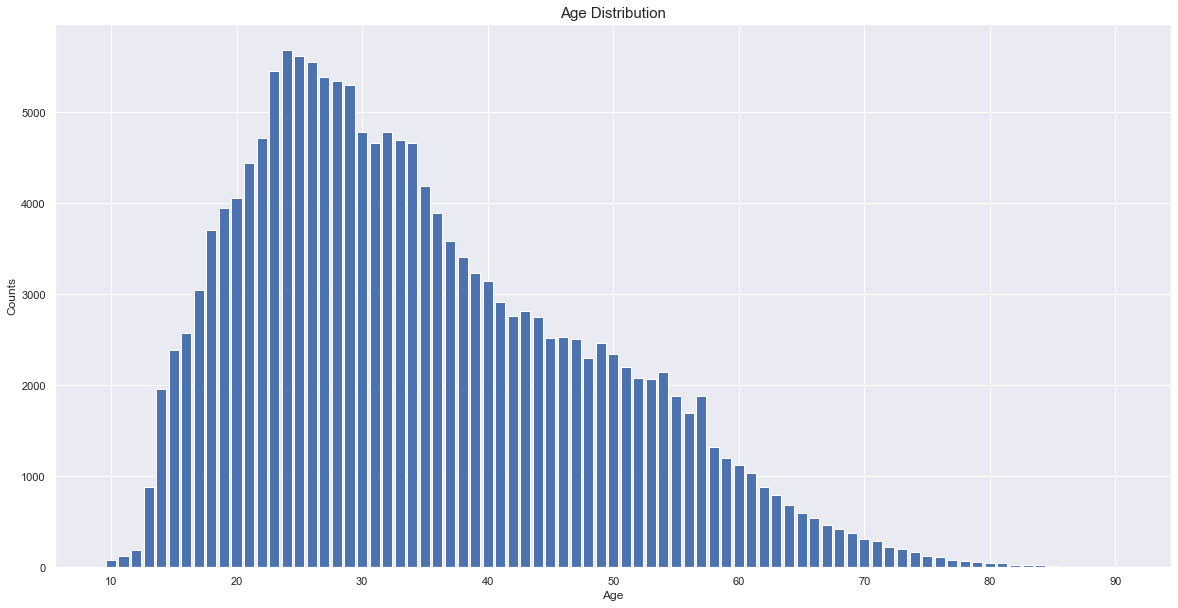

In [90]:
age = users_df.Age.value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(age.index, age.values)
plt.title('Age Distribution',  fontsize=15)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

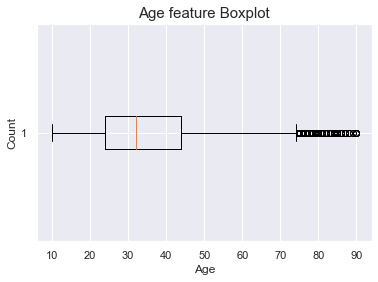

In [91]:
plt.boxplot(users_df["Age"].dropna(), vert=False)
plt.title("Age feature Boxplot", fontsize = 15)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Also has lots of outliers and the distribution it's a little bit skewed, so for this I will replace missing values with the median just like before. 

In [92]:
median_age = users_df['Age'].median()
users_df['Age'].fillna(median_age, inplace=True)
users_df['Age'].isna().sum()

0

In [93]:
users_df.isna().sum()

User-ID    0
Age        0
City       0
State      0
Country    0
dtype: int64

# 3. Merging Datasets

To merged the 3 tables of the 'Book Crossin' dataset, we are going to do it through the 'ISBN' feature in the case of rating and books tables, both of them include the same feature. 

In [94]:
merged_df = pd.merge(ratings_df, books_df, on='ISBN')
merged_df.head(3)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books


Once merged, I will merged again with the users table using 'User-ID' feature as a key point.

In [95]:
merged_df = pd.merge(merged_df, users_df, on='User-ID')

In [96]:
merged_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,State,Country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,32.0,tyler,texas,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,23.0,cincinnati,ohio,usa
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986.0,Tor Books,23.0,cincinnati,ohio,usa
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994.0,Vintage,23.0,cincinnati,ohio,usa
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996.0,HarperCollins,23.0,cincinnati,ohio,usa


In [97]:
merged_df.shape

(1031136, 11)

The merged dataset cointains more than 1 million of data records with 11 features. 

In [98]:
merged_df.isna().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Age                    0
City                   0
State                  0
Country                0
dtype: int64

In [99]:
merged_df.dtypes

User-ID                  int64
ISBN                    object
Book-Rating              int64
Book-Title              object
Book-Author             object
Year-Of-Publication    float64
Publisher               object
Age                    float64
City                    object
State                   object
Country                 object
dtype: object

Let's turn the 'Age'  and 'Year-Of-Publciation' feature into an integer.  

In [100]:
merged_df["Age"] = merged_df["Age"].astype(int)
merged_df["Year-Of-Publication"] = merged_df["Year-Of-Publication"].astype(int)
merged_df.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,State,Country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,32,tyler,texas,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,23,cincinnati,ohio,usa


In [101]:
merged_df.dtypes

User-ID                 int64
ISBN                   object
Book-Rating             int64
Book-Title             object
Book-Author            object
Year-Of-Publication     int32
Publisher              object
Age                     int32
City                   object
State                  object
Country                object
dtype: object

In [102]:
merged_df.to_csv('merged_df.csv', index=False)

# 4. Data Visualization

**The most popular Authors**

In [103]:
popular_authors = merged_df["Book-Author"].value_counts().nlargest(20)
popular_authors

Stephen King                 10053
Nora Roberts                  8429
John Grisham                  6010
James Patterson               5845
Mary Higgins Clark            4777
Dean R. Koontz                4313
Tom Clancy                    4036
Danielle Steel                3726
Sue Grafton                   3457
Janet Evanovich               3350
Anne Rice                     3030
Michael Crichton              2921
J. K. Rowling                 2908
JOHN GRISHAM                  2808
V.C. Andrews                  2785
Sandra Brown                  2663
Nicholas Sparks               2650
R. L. Stine                   2606
Rich Shapero                  2502
Patricia Daniels Cornwell     2461
Name: Book-Author, dtype: int64

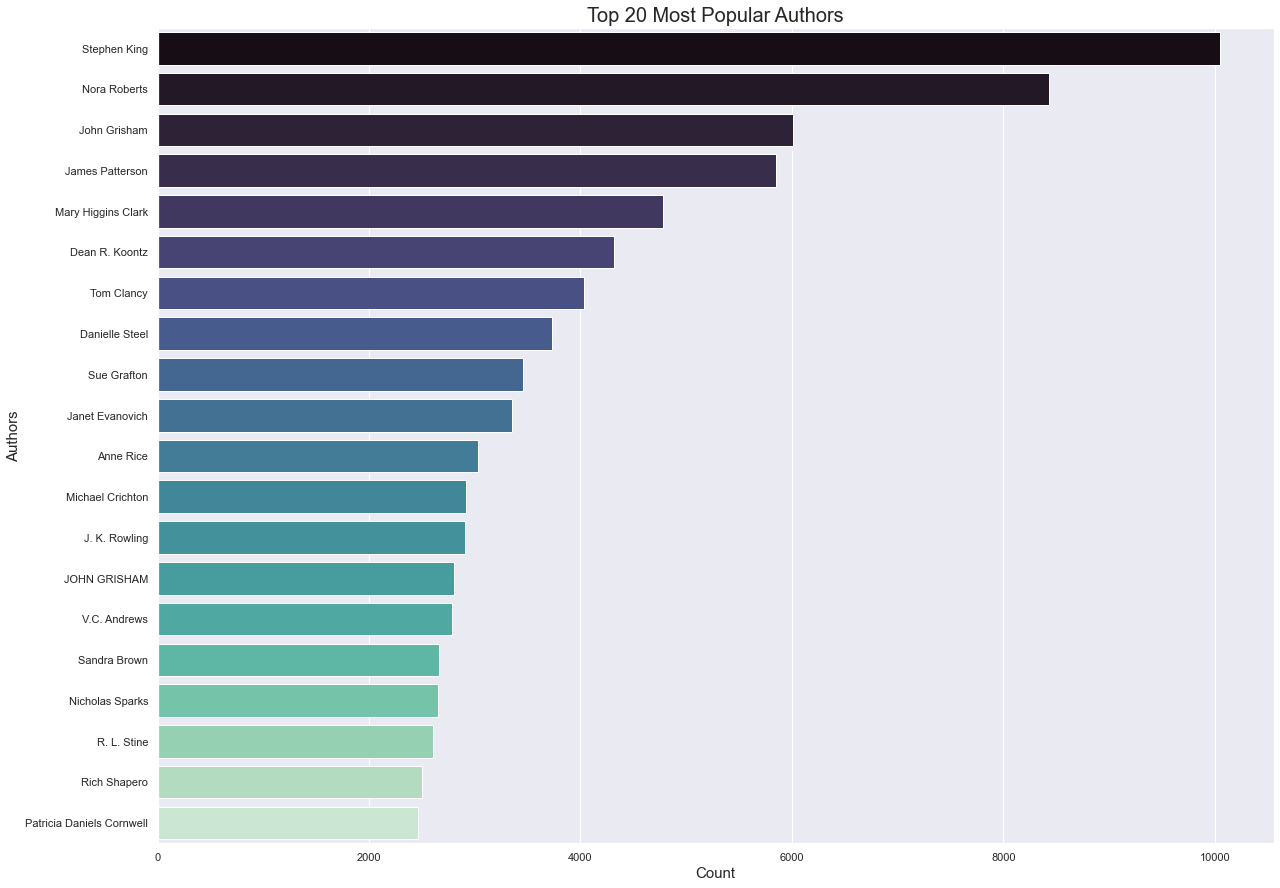

In [104]:
plt.figure(figsize=(20, 15))
sns.barplot(x =popular_authors, y =popular_authors.index, palette='mako')
plt.title('Top 20 Most Popular Authors',  fontsize=20)
plt.xlabel('Count',  fontsize=15)
plt.ylabel('Authors',  fontsize=15)
plt.show()

**Top 10 Rated Authors**

In [105]:
author_ratings = merged_df.groupby('Book-Author')['Book-Rating'].mean()
top_authors = author_ratings.sort_values(ascending=False)
top_authors.head(10)

Book-Author
Harold Tietjens    10.0
H. Rackham         10.0
Bob Edwards        10.0
H. J. Jackson      10.0
H. J. de  Blij     10.0
Randy Bright       10.0
H. K. Suh          10.0
Bob Cary           10.0
Sara Withers       10.0
Randy Connor       10.0
Name: Book-Rating, dtype: float64

**The most popular Books**

In [106]:
popular_books = merged_df["Book-Title"].value_counts().nlargest(10)
popular_books

Wild Animus                                        2502
The Lovely Bones: A Novel                          1295
The Da Vinci Code                                   898
A Painted House                                     838
The Nanny Diaries: A Novel                          828
Bridget Jones's Diary                               815
The Secret Life of Bees                             774
Divine Secrets of the Ya-Ya Sisterhood: A Novel     740
The Red Tent (Bestselling Backlist)                 723
Angels &amp; Demons                                 670
Name: Book-Title, dtype: int64

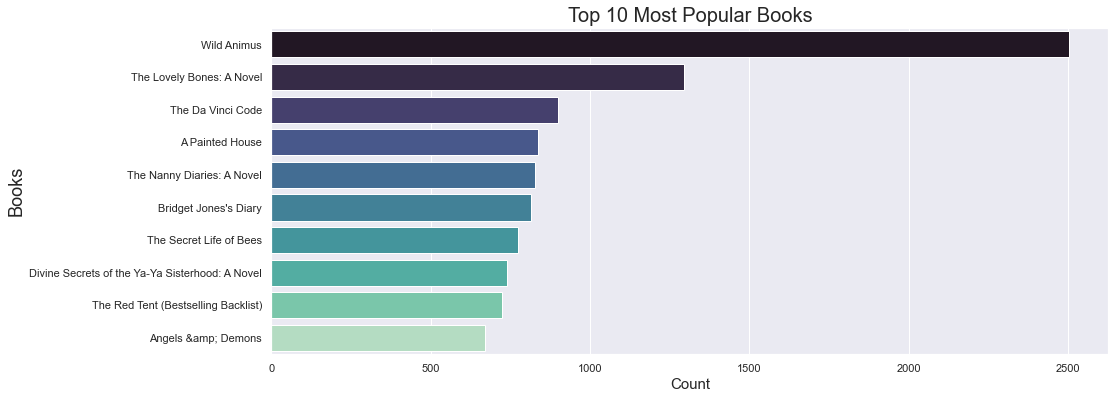

In [107]:
plt.figure(figsize=(15,6))
sns.barplot(x =popular_books, y =popular_books.index, palette='mako')
plt.title('Top 10 Most Popular Books',  fontsize=20)
plt.xlabel('Count',  fontsize=15)
plt.ylabel('Books',  fontsize=18)
plt.xticks
plt.show()

**Top 10 Rated Books**

In [108]:
book_ratings = merged_df.groupby('Book-Title')['Book-Rating'].mean()
top_books = book_ratings.sort_values(ascending=False)
top_books.head(10)

Book-Title
Film Is: The International Free Cinema                                                                                                    10.0
More Secrets of Happy Children: Embrace Your Power as a Parent--and Help Your Children be Confident, Positive, Well-Adjusted and Happy    10.0
Jo's Boys : From the Original Publisher                                                                                                   10.0
The Vanished Priestess : An Annie Szabo Mystery                                                                                           10.0
Game and Hunting                                                                                                                          10.0
Joan Miro: 1893-1983 (Basic Series)                                                                                                       10.0
The Vampire's Apprentice                                                                                                           

**The most popular Publishers**

In [109]:
publisher_common = books_df['Publisher'].value_counts().nlargest(10)
print(publisher_common)

Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: Publisher, dtype: int64


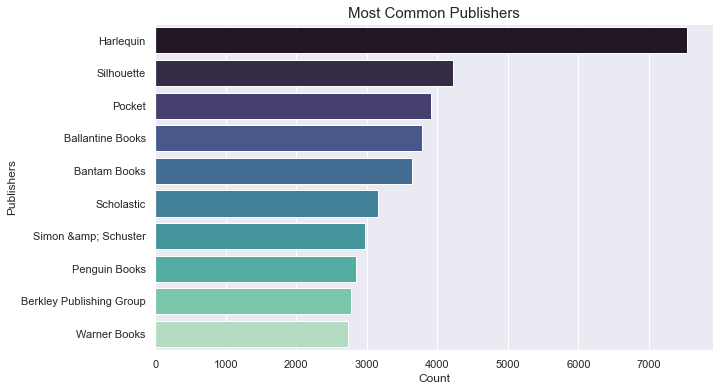

In [110]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x =publisher_common, y =publisher_common.index, palette='mako')
plt.title('Most Common Publishers',  fontsize=15)
plt.xlabel('Count')
plt.ylabel('Publishers')
plt.show()

**Cities with more users**

In [111]:
top_cities = users_df.City.value_counts()[:10]
print(f'The 10 cities with the most users are:\n{top_cities}')

The 10 cities with the most users are:
london       4105
barcelona    2664
toronto      2342
madrid       1933
sydney       1884
portland     1869
melbourne    1863
vancouver    1699
chicago      1566
seattle      1541
Name: City, dtype: int64


In [112]:
top_countries = users_df.Country.value_counts()[:10]
print(f'The 10 cities with the most users are:\n{top_countries}')

The 10 cities with the most users are:
 usa               139183
 canada             21556
 united kingdom     18286
 germany            17021
 spain              13088
 australia          11719
 italy              11238
unknown              4579
 france              3440
 portugal            3305
Name: Country, dtype: int64


**Users age with more Books count**

In [113]:
age_book_count = merged_df.groupby('Age')['User-ID'].count()

# Find ages with the highest book count
top_age_groups = age_book_count.nlargest(10)  # Change the number to display more or fewer age groups

# Display the ages with the highest book count
print(top_age_groups)

Age
32    312223
33     32862
29     30646
30     27201
36     26096
28     25966
31     25964
34     25893
38     22396
27     22280
Name: User-ID, dtype: int64


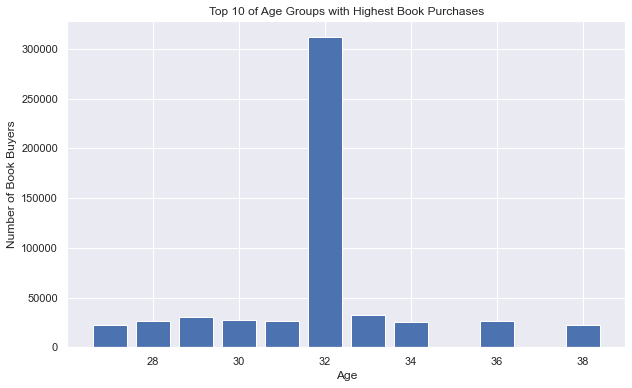

In [114]:
plt.figure(figsize=(10, 6))
plt.bar(top_age_groups.index, top_age_groups.values)
plt.xlabel('Age')
plt.ylabel('Number of Book Buyers')
plt.title('Top 10 of Age Groups with Highest Book Purchases')
plt.show()


**Ratings Count by Age**

In [115]:
age_ratings = merged_df.groupby('Age')['Book-Rating'].count()
print(age_ratings)

Age
10     227
11     513
12     747
13    1243
14    3206
      ... 
84      35
85      17
86       2
89       2
90      45
Name: Book-Rating, Length: 79, dtype: int64


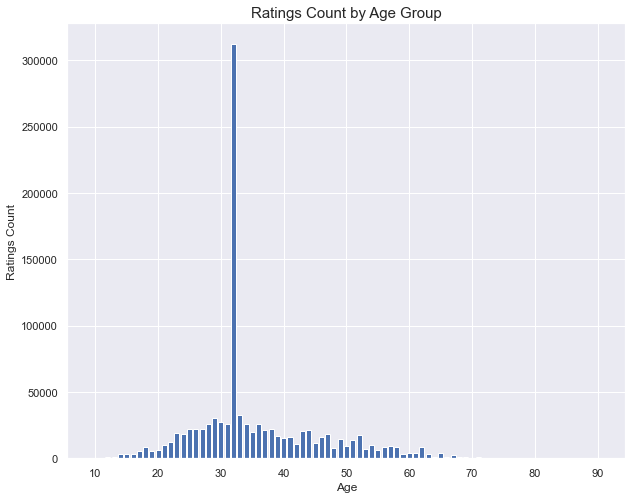

In [116]:
plt.figure(figsize=(10, 8))
plt.bar(age_ratings.index, age_ratings.values)
plt.xlabel('Age')
plt.ylabel('Ratings Count')
plt.title('Ratings Count by Age Group', fontsize = 15)
plt.show()

**Users Age with more Ratings**

In [117]:
ages_df = merged_df.loc[merged_df['Book-Rating'].between(1, 10, inclusive=True)]
age_ratings = ages_df.groupby('Age')['Book-Rating'].count()
top_age_groups = age_ratings.nlargest(5) 
print(top_age_groups)

Age
32    126246
29     11387
33     10035
28      9687
52      9460
Name: Book-Rating, dtype: int64


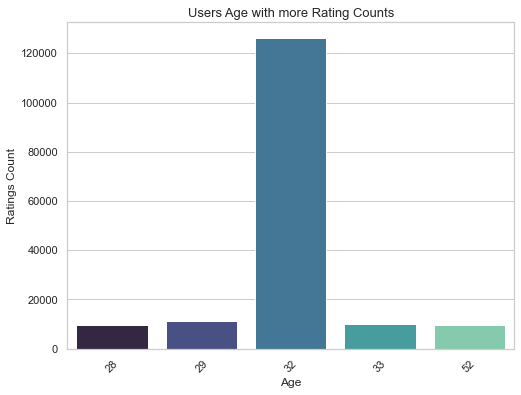

In [118]:
sns.set(style="whitegrid")

# Set the Mako color palette
colors = sns.color_palette("mako", len(top_age_groups))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the width and height as needed

# Create the bar plot
sns.barplot(x=top_age_groups.index, y=top_age_groups.values, palette=colors, ax=ax)

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Ratings Count')
ax.set_title('Users Age with more Rating Counts', fontsize = 13)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Users Age with less Ratings**

In [119]:
ages_df = merged_df.loc[merged_df['Book-Rating'].between(1, 10, inclusive=True)]
age_ratings = ages_df.groupby('Age')['Book-Rating'].count()
bottom_age_groups = age_ratings.nsmallest(5)  
print(bottom_age_groups)

Age
86     1
89     1
85    12
84    15
90    35
Name: Book-Rating, dtype: int64


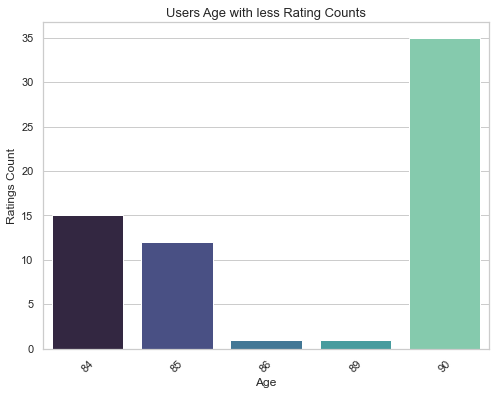

In [120]:
sns.set(style="whitegrid")

# Set the Mako color palette
colors = sns.color_palette("mako", len(bottom_age_groups))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the width and height as needed

# Create the bar plot
sns.barplot(x=bottom_age_groups.index, y=bottom_age_groups.values, palette=colors, ax=ax)

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Ratings Count')
ax.set_title('Users Age with less Rating Counts', fontsize = 13)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Users Age that leave no rating**

In [121]:
ages_df1 = merged_df.loc[merged_df['Book-Rating'] == 0]
ages_no_rating = ages_df1.groupby('Age')['Book-Rating'].count()
users_age_no_rating = ages_no_rating.nlargest(5)  
print(users_age_no_rating)

Age
32    185977
33     22827
29     19259
36     18366
30     18312
Name: Book-Rating, dtype: int64


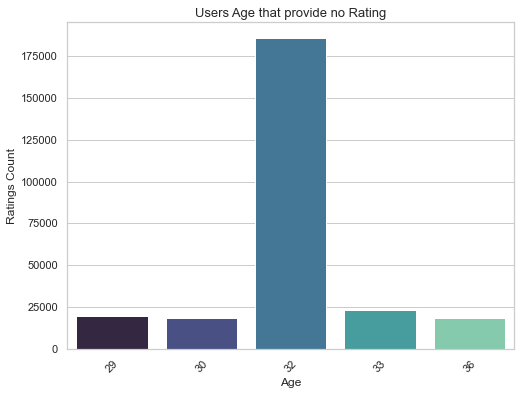

In [122]:
sns.set(style="whitegrid")

# Set the Mako color palette
colors = sns.color_palette("mako", len(users_age_no_rating))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the width and height as needed

# Create the bar plot
sns.barplot(x=users_age_no_rating.index, y=users_age_no_rating.values, palette=colors, ax=ax)

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Ratings Count')
ax.set_title('Users Age that provide no Rating', fontsize = 13)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Books Published by Year**

In [123]:
filtered_books_df = books_df[books_df['Year-Of-Publication'] >= 1900]

# Group by year and calculate the count
books_per_year = filtered_books_df.groupby('Year-Of-Publication').size()

# Print the result
print(books_per_year)

Year-Of-Publication
1900.0        3
1901.0        7
1902.0        2
1904.0        1
1906.0        1
          ...  
2000.0    17234
2001.0    17359
2002.0    17627
2003.0    14359
2004.0     5839
Length: 97, dtype: int64


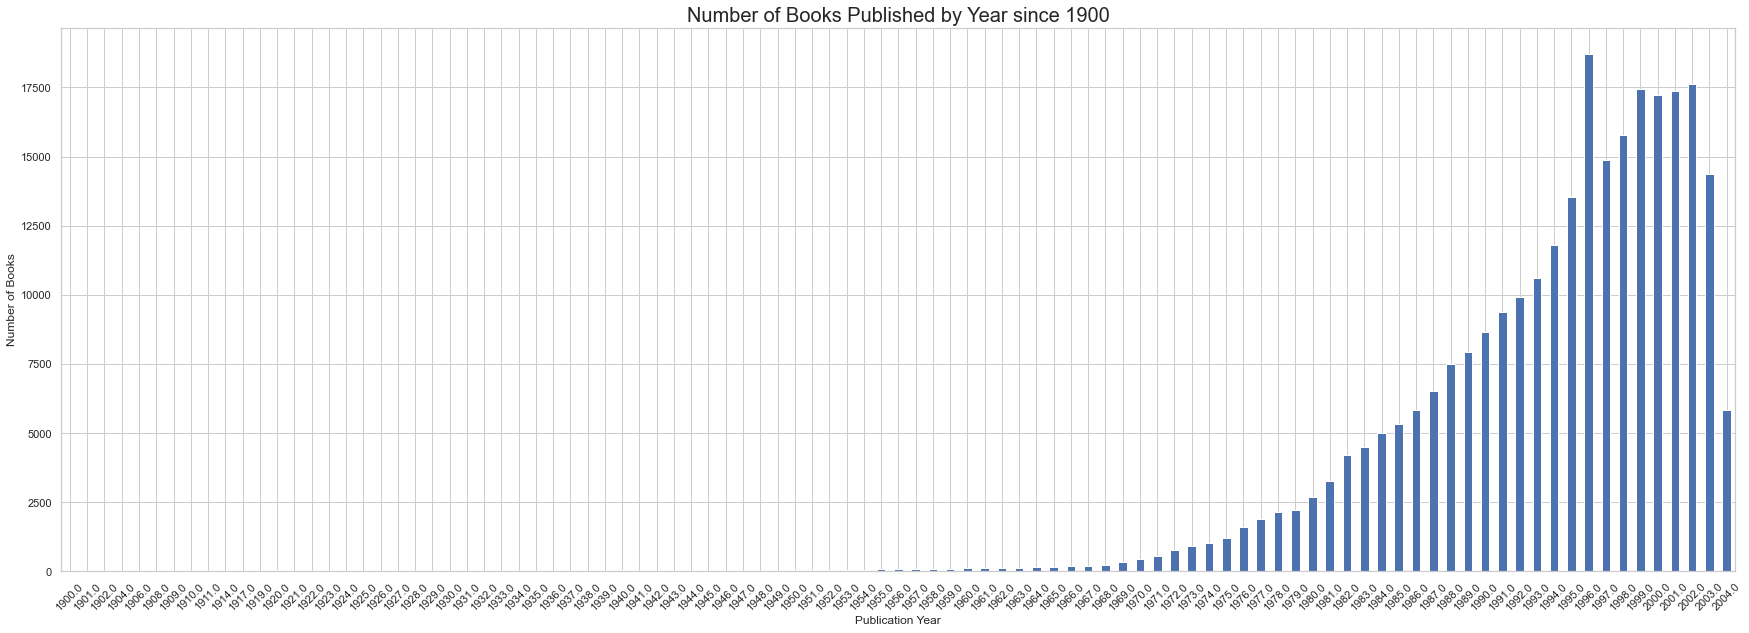

In [124]:
fig, ax = plt.subplots(figsize=(30, 10)) 

# Create the bar plot
books_per_year.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Publication Year')
ax.set_ylabel('Number of Books')
ax.set_title('Number of Books Published by Year since 1900', fontsize =20)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Cities with more readers**

In [125]:
city_reader_count = merged_df.groupby('City')['User-ID'].count()
top_cities_readers = city_reader_count.nlargest(10)
print(top_cities_readers)

City
toronto      15124
unknown      14151
chicago       9078
seattle       8605
ottawa        8330
olympia       8090
st. louis     7305
london        7290
omaha         7282
portland      7135
Name: User-ID, dtype: int64


In [126]:
city_reader_count = merged_df[merged_df['City'] != 'unknown'].groupby('City')['User-ID'].count()
top_cities_readers = city_reader_count.nlargest(10)
print(top_cities_readers)

City
toronto      15124
chicago       9078
seattle       8605
ottawa        8330
olympia       8090
st. louis     7305
london        7290
omaha         7282
portland      7135
san diego     6626
Name: User-ID, dtype: int64


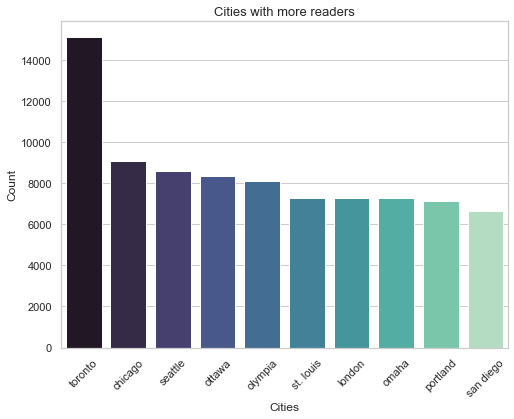

In [127]:
sns.set(style="whitegrid")
colors = sns.color_palette("mako", len(top_cities_readers))
fig, ax = plt.subplots(figsize=(8, 6))  
sns.barplot(x=top_cities_readers.index, y=top_cities_readers.values, palette=colors, ax=ax)
ax.set_xlabel('Cities')
ax.set_ylabel('Count')
ax.set_title('Cities with more readers', fontsize = 13)
plt.xticks(rotation=45)
plt.show()

**Countries with more readers**

In [128]:
country_readers = merged_df[merged_df['Country'] != 'unknown'].groupby('Country')['User-ID'].count()
top_country_readers = country_readers.nlargest(10)
print(top_country_readers)

Country
 usa               745052
 canada             92917
 united kingdom     32000
 germany            27654
 australia          18213
 spain              14772
 france             10632
 portugal            6862
 new zealand         5554
 malaysia            5048
Name: User-ID, dtype: int64


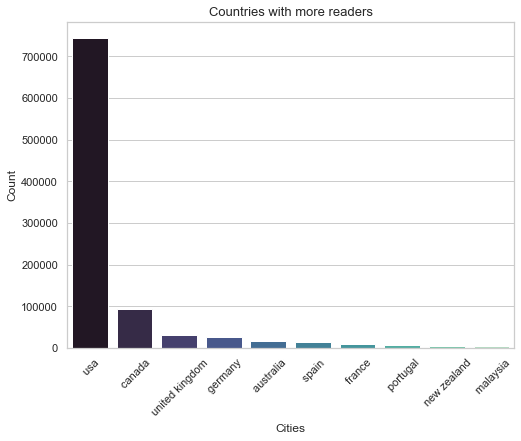

In [129]:
sns.set(style="whitegrid")
colors = sns.color_palette("mako", len(top_country_readers))
fig, ax = plt.subplots(figsize=(8, 6))  
sns.barplot(x=top_country_readers.index, y=top_country_readers.values, palette=colors, ax=ax)
ax.set_xlabel('Cities')
ax.set_ylabel('Count')
ax.set_title('Countries with more readers', fontsize = 13)
plt.xticks(rotation=45)
plt.show()

## 5. Content and Collaborative Filtering

"The Collaborative filtering method for recommender systems is a method that is solely based on the past interactions that have been recorded between users and items, in order to produce new recommendations."(3) So what the collaborative filtering does it's find similar users among all the users and group them, what this filtering does is recommend products or services that other people belonging to their group have purchased.
on the other hand the content filtering what it does is use additional information about the users (information like job, sex, area or city where they live, etc) and make recommendation (products or services) base on this additional information. 

So this methods are being use by platforms like amazon, aliexpress,netflix, etc. because allow them to provide personalized recommendations to their users and they doing this because it impact in sales and conversion rates, at the end of the day this is what it matters to them. 

The 'Book Crossing' dataset is a dataset that would be considered as large, this situation implies that applying certain logarithms and machine learning functions and models is very inefficient and ineffective because it consumes a lot of computer memory, for this reason I will proceed to segment part of our dataset to streamline certain processes. 

In the 'User-ID' feature I will choose only users who have more than 100 ratings in their account. When making a system recommendation, it is better to work with the data of the users who have used the platform the most.

In [130]:
x = merged_df['User-ID'].value_counts() > 100

y = x[x].index 
print(y.shape)
book_crossing_df = merged_df[merged_df['User-ID'].isin(y)]

(1648,)


Also creating a new feature from the 'Book-Title' and 'Book-Rating' features, where i can get the total number of ratings per book. 

In [131]:
number_rating = book_crossing_df.groupby('Book-Title')['Book-Rating'].count().reset_index()

In [132]:
number_rating.rename(columns = {'Book-Rating':'Number-Of-Ratings'}, inplace=True)

And including this new feature in the final merged dataset and creating a new subset dataset "df_with_number_rating". 

In [133]:
df_with_number_rating = book_crossing_df.merge(number_rating, on='Book-Title')

In [134]:
df_with_number_rating.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,State,Country,Number-Of-Ratings
0,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,34,strafford,missouri,usa,22
1,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,32,beaverton,oregon,usa,22


Just by choosing all the users that has given more than 100 ratings I already reduced the dataset to half. 

In [135]:
df_with_number_rating.shape

(591896, 12)

At the same time to create the recommendation system i will work with books that has received more than 100 ratings. I choose to work with this number just to keep efficiency and effectiveness of the work tool (laptop) because if I worked with a smaller number(25 or 50), I constantly had errors.

In [136]:
df_with_number_rating = df_with_number_rating[df_with_number_rating['Number-Of-Ratings'] >= 100]
df_with_number_rating.drop_duplicates(['User-ID', 'Book-Title'], inplace = True)

Having done this type of segregation, my dataset to perform the recommendation system is the following:

In [137]:
df_with_number_rating.shape

(44851, 12)

**Splitting the Data into Train and Test Sets**

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test = train_test_split(df_with_number_rating, test_size =0.30, random_state=42)

print(X_train.shape)
print(X_test.shape)

(31395, 12)
(13456, 12)


# 5.1 User-User Collaborative Filtering

When it comes to built a recommendation system, creating a pivot table is typically one of the initial steps in building a collaborative filtering recommendation system. Once you have the pivot table, you can apply recommendation algorithms or techniques to generate recommendations for users based on their past ratings or interactions. So the pivot table it's goign to be built as 'User-ID' feature as the index and 'ISBN' as the columns, and 'Book-Rating' as the values.

In [140]:
df_pivot = X_train.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating')
df_pivot.fillna(0, inplace=True)

In [141]:
df_pivot.head()

ISBN,002542730X,002542730x,0060093102,0060129565,0060158638,0060168013,006017322X,0060283122,0060392452,0060502258,...,B00007CWQC,B00008WFXL,B00009EF82,B0000C7BNG,B0000E63CJ,B0000T6KHI,B0000T6KIM,B0000VZEH8,B0001FZGPI,B0001PIOX4
User-ID,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's create dummy train and test sets, now by applying a lambda function I'm changing all the rating to zero, this way we create binary representation where 1 represents books that the user has rated and 0 represents books that the user has not rated. This step is typically done to evaluate the performance of the recommendation system by comparing the predicted ratings with the actual ratings. 

In the train set, any missing values  are filled with 1, this represents any books that were not rated by users and in the test set missing values are fill with 0, representing books not rated by users. 

In [142]:
#Creating dummy train and test sets
dummy_train = X_train.copy()
dummy_test = X_test.copy()

dummy_train['Book-Rating'] = dummy_train['Book-Rating'].apply(lambda x: 0 if x > 0 else 1)
dummy_test['Book-Rating'] = dummy_test['Book-Rating'].apply(lambda x: 1 if x > 0 else 0)

#The books not rated by users is marked as 1 for prediction
dummy_train_pivot = dummy_train.pivot_table(index='User-ID', columns ='ISBN', values='Book-Rating')
dummy_train_pivot.fillna(1, inplace=True)

#The books not rated by users is marked as 0 for evaluation
dummy_test_pivot = dummy_test.pivot(index='User-ID', columns ='ISBN', values='Book-Rating').fillna(0)

In [143]:
dummy_train_pivot.head()

ISBN,002542730X,002542730x,0060093102,0060129565,0060158638,0060168013,006017322X,0060283122,0060392452,0060502258,...,B00007CWQC,B00008WFXL,B00009EF82,B0000C7BNG,B0000E63CJ,B0000T6KHI,B0000T6KIM,B0000VZEH8,B0001FZGPI,B0001PIOX4
User-ID,,,,,,,,,,,,,,,,,,,,,
254,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
507,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
882,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1424,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1435,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


To create the user-user similarity matrix it's necesary to import the cosine_similarity library. "Cosine similarity in the recommendation system is used with the same principle of cosine angles, where even if the similarity of the content is less similar it would be considered as the least recommended content, and for higher similarity of contents, the recommendations generated would be at the top."(4)

In [144]:
from sklearn.metrics.pairwise import cosine_similarity

In [145]:
user_similarity = cosine_similarity(df_pivot)
user_similarity[np.isnan(user_similarity)] = 0
print(user_similarity)
print(user_similarity.shape)

[[1.         0.37796447 0.         ... 0.         0.         0.        ]
 [0.37796447 1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
(1598, 1598)


Next, will be predicting the user rating on the books, 

In [146]:
user_predicted_ratings = np.dot(user_similarity, df_pivot)
user_predicted_ratings

array([[1.86934144, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [4.31052725, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [6.94184849, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [5.79698422, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.50822826, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [147]:
user_predicted_ratings.shape

(1598, 947)

 Now, it's time to calculate the final user ratings by multiplicating the user_predicted_ratings matrix and the dummy_train_pivot matrix. The result will also be a matrix  that provides the final ratings that can be used for recommending books to users. 

In [148]:
# np.multiply for cell-by-cell multiplication
user_final_ratings = np.multiply(user_predicted_ratings, dummy_train_pivot)
user_final_ratings.head()

ISBN,002542730X,002542730x,0060093102,0060129565,0060158638,0060168013,006017322X,0060283122,0060392452,0060502258,...,B00007CWQC,B00008WFXL,B00009EF82,B0000C7BNG,B0000E63CJ,B0000T6KHI,B0000T6KIM,B0000VZEH8,B0001FZGPI,B0001PIOX4
User-ID,,,,,,,,,,,,,,,,,,,,,
254,1.869341,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,7.380539,10.734058,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
507,4.310527,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,6.885005,12.332176,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
882,6.941848,0.0,0.0,0.0,0.0,2.874783,0.0,0.0,8.197400,11.359725,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1424,3.879681,0.0,0.0,0.0,0.0,3.290541,0.0,0.0,8.334508,5.639706,...,0.0,0.0,0.0,0.0,0.0,1.195293,0.0,0.0,0.0,0.0
1435,1.484750,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.554283,2.628880,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


As it can be seen this matrix contains the predicted ratings for books that users have not yet rated, and the book ratings that users have already rated are zero. 

Next, it's time to extract and display the recommendations for a specific user based on the user_final_ratings matrix.

In [149]:
uid = user_final_ratings.index[42]
print('User-ID: ', uid)
print('')
book_isbn = list(df_pivot.iloc[42].sort_values(ascending = False)[0:10].index)
print('Books Rated by the user')
print('')
for i in range(10):
    bindex = np.where(merged_df['ISBN']==book_isbn[i])[0][0]
    book_title = merged_df['Book-Title'][bindex]
    print(book_title)
print(' ')    
print(' ')    
book_isbn=list(user_final_ratings.iloc[42].sort_values(ascending = False)[0:10].index)
print('Books Recommended for the user')
print('')
for i in range(10):
    bindex = np.where(merged_df['ISBN']==book_isbn[i])[0][0]
    book_title = merged_df['Book-Title'][bindex]
    print(book_title)

User-ID:  8681

Books Rated by the user

The Handmaid's Tale
The Secret Life of Bees
The English Patient
Harry Potter and the Sorcerer's Stone (Book 1)
The Alienist
The Return of the King (The Lord of the Rings, Part 3)
The Two Towers (The Lord of the Rings, Part 2)
One Door Away from Heaven
The Subtle Knife (His Dark Materials, Book 2)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
 
 
Books Recommended for the user

Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Goblet of Fire (Book 4)
Divine Secrets of the Ya-Ya Sisterhood: A Novel
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Prisoner of Azkaban (Book 3)
The Lovely Bones: A Novel
The Da Vinci Code
Wicked: The Life and Times of the Wicked Witch of the West
The Divine Secrets of the Ya-Ya Sisterhood: A Novel
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))


In this case the recommendations were made for the user 8681, we can see 10 books he rated and based on this information, the recomendation system sugest another 10 books that this user would probably enjoy to read.

**Evaluation of the Recommendation System**

We will use the similar method of prediction as we have done before. The only difference is that we will evaluate for the books already rated by the user instead of predicting it for the books not rated by the user.

**User-User**

In [150]:
test_user_features = X_test.pivot(index = 'User-ID', columns = 'ISBN', values = 'Book-Rating').fillna(0)
test_user_similarity = cosine_similarity(test_user_features)
test_user_similarity[np.isnan(test_user_similarity)] = 0

print(test_user_similarity)
print(test_user_similarity.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(1510, 1510)


In [151]:
user_predicted_ratings_test = np.dot(test_user_similarity, test_user_features)
user_predicted_ratings_test

array([[0.        , 0.83319773, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Proceding to test and calculate the final user ratings for the test dataset specifically for the books that the user has rated.

In [152]:
test_user_final_rating = np.multiply(user_predicted_ratings_test, dummy_test_pivot)
test_user_final_rating.head()

ISBN,0020697406,002542730X,002542730x,0060094818,0060129565,0060158638,0060168013,0060392452,0060502258,0060518286,...,2290303348,3404143434,3453177746,5552027574,8401422345,8401491029,9506440298,B00006I4OX,B00009EF82,B0000T6KHI
User-ID,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, proceding to normalize the predicted ratings obtained from the recommendation system to a specific range. When providing ratings to users or comparing them with various products, normalization is frequently used to make sure that the ratings are on a certain scale.

In [153]:
from sklearn.preprocessing import MinMaxScaler

In [154]:
# Normalizing so the final rating values  can be between range
X = test_user_final_rating.copy()

#Non-zero values as 0 will mean that the user have not rated the books
X = X[X > 0]

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)

print(pred)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [155]:
#Calculating non-NaN values
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

3895

In [156]:
test = X_test.pivot(index = 'User-ID', columns = 'ISBN', values = 'Book-Rating')
test.head()

ISBN,0020697406,002542730X,002542730x,0060094818,0060129565,0060158638,0060168013,0060392452,0060502258,0060518286,...,2290303348,3404143434,3453177746,5552027574,8401422345,8401491029,9506440298,B00006I4OX,B00009EF82,B0000T6KHI
User-ID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


"Recommender System accuracy is popularly evaluated through two main measures: Root Mean Squared Error (RMSE) and Mean Absolute Error(MAE)." (7) 

Root Mean Square Error (RMSE)  quantifies the average magnitude of the prediction errors and provides a measure of how well the predicted ratings match the actual ratings. A lower RMSE indicates better accuracy and a closer fit between the predicted and actual ratings.

In [157]:
#Calculating RMSE Score
diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum()
rmse = np.sqrt(sum_of_squares_err/total_non_nan)
print(rmse)

5.653755064724341


In [158]:
#Calculating MAE
mae = np.abs(pred - test).sum().sum()/total_non_nan
print(mae)

5.355347967367134


Getting a RMSE of 5.65 and a MAE og 5.35 means that both results are predicting ratings on a moderate level. In this particular case the MAE it's getting a better result. 

Now, let's evaluate the item based recommendation model.

**Item-Item**

In [159]:
test_item_features = X_test.pivot(index = 'ISBN', columns = 'User-ID', values = 'Book-Rating').fillna(0)
test_item_similarity = cosine_similarity(test_item_features)
test_item_similarity[np.isnan(test_item_similarity)] = 0

print(test_item_similarity)
print(test_item_similarity.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(785, 785)


In [160]:
item_predicted_ratings_test = np.dot(test_item_features.T, test_item_similarity)

# Testing on the Books already rated by the User

In [161]:
test_item_final_rating = np.multiply(item_predicted_ratings_test, dummy_test_pivot)

In [162]:
# Normalizing the ratings
X = test_item_final_rating.copy()
#Considering non-zero values as 0 means the user have not rated the books
X = X[X > 0]

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)

print(pred)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [163]:
#Total non-NaN values
total_non_nan = np.count_nonzero(~np.isnan(pred))

In [164]:
test = X_test.pivot(index = 'User-ID', columns = 'ISBN', values = 'Book-Rating')

Let's calculate RMSE and MAE score to see how the recommendation system it's working: 

In [165]:
#Calculating RMSE Score
diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum()
rmse = np.sqrt(sum_of_squares_err/total_non_nan)
print(rmse)

6.091001650473443


In [166]:
#Calculating MAE
mae = np.abs(pred - test).sum().sum()/total_non_nan
print(mae)

5.809124690097497


This mean that on average, the item to item collaborative filtering based recommendation system is also getting a moderate (RMSE = 6.09 and MAE=5.80) level of prediting the actual ratings. 

These results suggest that, in this specific evaluation, the user-user collaborative filtering approach performs slightly better in terms of accuracy when predicting ratings for the Book Crossing dataset. Although the user-user performs better than the item-item recommendation system, this still means that users are not receiving 100% recommendations that fit their needs, so it is important to experiment with different recommendation systems in order to achieve the customer satisfaction that they deserve. 

In [167]:
!pip install mlxtend

In [168]:
from mlxtend.frequent_patterns import apriori, association_rules

In [169]:
book_titles = merged_df["Book-Title"].unique()
book_id_mapping = {title: i for i, title in enumerate(book_titles)}
merged_df["Book-ID"] = merged_df["Book-Title"].map(book_id_mapping)

In [170]:
def item_based_recommender(book_title, data):
    book_ratings = data[book_title]
    return data.corrwith(book_ratings).sort_values(ascending=False).head(10)

In [171]:
def user_based_data_creation(df):
    comment_counts = pd.DataFrame(df["Book-Title"].value_counts())
    rare_books = comment_counts[comment_counts["Book-Title"] <= 50].index
    common_books = df[~df["Book-Title"].isin(rare_books)]
    user_book_df = common_books.pivot_table(index=["User-ID"], columns=["Book-Title"], values="Book-Rating")
    return user_book_df

In [172]:
def book_recommendation(data, method, book_title="", user_id=0):
    if method == 1:
        if sum(data["Book-Title"].astype(str).str.contains(book_title)) == 0:
            print("Apologies, you have selected a book that is not in the list...")
        else:
            user_data = user_based_data_creation(data)
            recommended_books = item_based_recommender(book_title, user_data).index[0:2].tolist()
            print(recommended_books, type(recommended_books))

    elif method == 2:
        if sum(data["User-ID"].astype(str).str.contains(str(user_id))) == 0:
            print("Sorry, you have entered a user ID that is not in the list....")
        else:
            user_data = user_based_data_creation(data)
            read_books_df = user_data[user_data.index == user_id]
            read_books_list = read_books_df.columns[read_books_df.notna().any()].tolist()
            read_books_data = user_data[read_books_list]
            read_books_count = read_books_data.T.notnull().sum()
            read_books_count = read_books_count.reset_index()
            read_books_count.columns = ["user_id", "book_count"]
            threshold = len(read_books_list) * 60 / 100
            similar_users = read_books_count[read_books_count["book_count"] > threshold]["user_id"]
            final_data = pd.concat([read_books_data[read_books_data.index.isin(similar_users)],
                                    read_books_df[read_books_list]])
            corr_data = final_data.T.corr().unstack().sort_values().drop_duplicates()
            corr_data = pd.DataFrame(corr_data, columns=["Correlation"])
            corr_data.index.names = ["user_id_1", "user_id_2"]
            corr_data = corr_data.reset_index()
            similar_users = corr_data[(corr_data["user_id_2"] == user_id) & (corr_data["Correlation"] > 0)].sort_values(
                "Correlation", ascending=False)[["user_id_1", "Correlation"]]
            similar_users.rename(columns={"user_id_1": "User-ID"}, inplace=True)
            similar_users_ratings = similar_users.merge(data[["User-ID", "Book-ID", "Book-Rating"]], how="inner")
            similar_users_ratings = similar_users_ratings[similar_users_ratings["User-ID"] != user_id]
            similar_users_ratings["Weighted_Average_Recommendation"] = similar_users_ratings["Correlation"] * \
                                                                        similar_users_ratings["Book-Rating"]
            top_df = similar_users_ratings.groupby("Book-ID").agg(
                {"Weighted_Average_Recommendation": "mean"}).sort_values("Weighted_Average_Recommendation",
                                                                         ascending=False)
            top_df = top_df.reset_index()
            user_based_recommendations = top_df.merge(data[["Book-ID", "Book-Title"]], on="Book-ID")["Book-Title"].head(2)
            print(user_based_recommendations)
    else:
        print("You made an incorrect entry")

In [173]:
book_recommendation(merged_df, method=1, book_title="The Lovely Bones")

['On Wings of Eagles', "Perfect Evil (Maggie O'Dell Novels (Paperback))"] <class 'list'>


In [174]:
book_recommendation(merged_df, method=1, book_title="The Handmaid's Tale")

['The Professor and the Madman', 'Dark Water (Mira Romantic Suspense)'] <class 'list'>


In [175]:
book_recommendation(merged_df, method=1, book_title="The Da Vinci Code")

['The Da Vinci Code', 'Long Dark Tea Time of the Soul'] <class 'list'>


In [176]:
#For better result you can select item based and "The Notebook" or user based and 98391 ID
book_recommendation(merged_df, method=2, user_id=98391)

0    An Anthology of New Zealand Poetry in English
1    An Anthology of New Zealand Poetry in English
Name: Book-Title, dtype: object


# Part II

# Market Basket Analysis

## Groceries Dataset

In [207]:
groceries_df = pd.read_csv("Groceries data.csv")

In [208]:
groceries_df.shape

(38765, 7)

In [209]:
groceries_df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [210]:
groceries_df["itemDescription"].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

In [211]:
groceries_df.isna().sum()

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [212]:
groceries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [213]:
#aggregating itemDescription based on Member_number and Date with "," seperator
df=groceries_df.groupby(['Member_number','Date'])['itemDescription'].agg(lambda x: ', '.join(set(x))).reset_index()

In [214]:
df.head()

,Member_number,Date,itemDescription
0,1000,2014-06-24,"salty snack, whole milk, pastry"
1,1000,2015-03-15,"yogurt, whole milk, semi-finished bread, sausage"
2,1000,2015-05-27,"pickled vegetables, soda"
3,1000,2015-07-24,"misc. beverages, canned beer"
4,1000,2015-11-25,"hygiene articles, sausage"


In [216]:
#extracting the third column from groceries dataset
items=df['itemDescription']

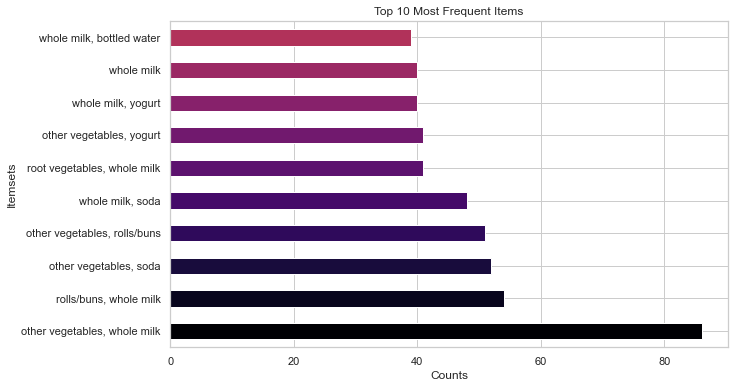

In [219]:
#visualizing top 10 itemsets
plt.rcParams['figure.figsize'] = (10, 6)
color = plt.cm.inferno(np.linspace(0, 1, 20))

# Determine top 10 items
top_10_itemsets = df['itemDescription'].value_counts().head(10)
top_10_itemsets.plot.barh(color=color)
plt.title('Top 10 Most Frequent Items')
plt.xlabel('Counts')
plt.ylabel('Itemsets')

plt.show()

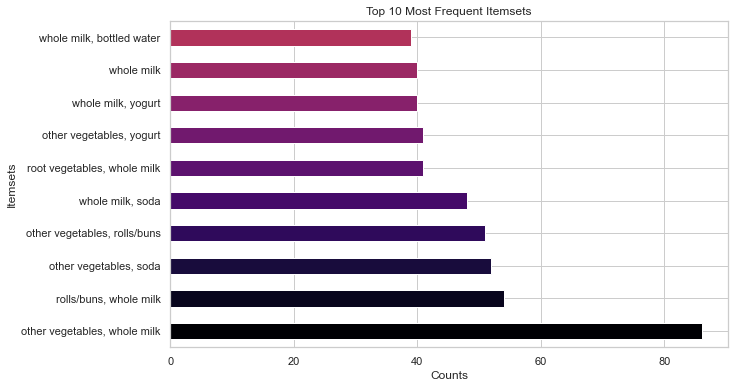

In [222]:
plt.rcParams['figure.figsize'] = (10, 6)
color = plt.cm.inferno(np.linspace(0, 1, 20))

# Get the top 10 itemsets
top_10_itemsets = items.value_counts().head(10)

# Plot the horizontal bar chart
top_10_itemsets.plot.barh(color=color)

plt.title('Top 10 Most Frequent Itemsets')
plt.xlabel('Counts')
plt.ylabel('Itemsets')

plt.show()

In [225]:
pip install squarify

In [226]:
import squarify

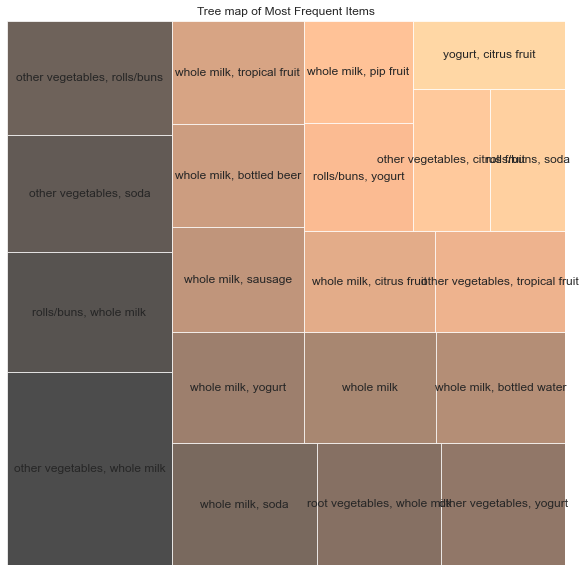

In [227]:
# Tree Map of Most Frequent Items

plt.rcParams['figure.figsize']=(10,10)
Items = df['itemDescription'].value_counts().head(20).to_frame()
size = Items.values
lab = Items.index
color = plt.cm.copper(np.linspace(0,1,20))
squarify.plot(sizes=size, label=lab, alpha = 0.7, color=color)
plt.title('Tree map of Most Frequent Items')
plt.axis('off')
plt.show()

In [228]:
#converting items to list
data=items.values.tolist()
data

['salty snack, whole milk, pastry',
 'yogurt, whole milk, semi-finished bread, sausage',
 'pickled vegetables, soda',
 'misc. beverages, canned beer',
 'hygiene articles, sausage',
 'rolls/buns, whole milk, sausage',
 'whole milk, soda',
 'frankfurter, whipped/sour cream, soda',
 'frankfurter, curd',
 'beef, white bread',
 'whole milk, butter',
 'other vegetables, frozen vegetables',
 'sugar, tropical fruit',
 'butter milk, specialty chocolate',
 'dental care, frozen meals',
 'rolls/buns',
 'root vegetables, detergent',
 'rolls/buns, sausage',
 'dish cleaner, cling film/bags',
 'frozen fish, canned beer',
 'whole milk, pip fruit, tropical fruit',
 'root vegetables, whole milk, pastry',
 'chocolate, rolls/buns, red/blush wine',
 'other vegetables, shopping bags',
 'chocolate, packaged fruit/vegetables, whole milk, rolls/buns',
 'hygiene articles, other vegetables',
 'whipped/sour cream, margarine',
 'rolls/buns',
 'softener, rolls/buns, bottled water',
 'rice, whole milk',
 'skin care, 

In [232]:
#convert the single string in each list to multiple strings separated by commas
table = []
for x in data:
    new_list = []
    y=x.split(',')
    for i in y:
        new_list.append(i.strip())
    table.append(new_list) 
table

[['salty snack', 'whole milk', 'pastry'],
 ['yogurt', 'whole milk', 'semi-finished bread', 'sausage'],
 ['pickled vegetables', 'soda'],
 ['misc. beverages', 'canned beer'],
 ['hygiene articles', 'sausage'],
 ['rolls/buns', 'whole milk', 'sausage'],
 ['whole milk', 'soda'],
 ['frankfurter', 'whipped/sour cream', 'soda'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread'],
 ['whole milk', 'butter'],
 ['other vegetables', 'frozen vegetables'],
 ['sugar', 'tropical fruit'],
 ['butter milk', 'specialty chocolate'],
 ['dental care', 'frozen meals'],
 ['rolls/buns'],
 ['root vegetables', 'detergent'],
 ['rolls/buns', 'sausage'],
 ['dish cleaner', 'cling film/bags'],
 ['frozen fish', 'canned beer'],
 ['whole milk', 'pip fruit', 'tropical fruit'],
 ['root vegetables', 'whole milk', 'pastry'],
 ['chocolate', 'rolls/buns', 'red/blush wine'],
 ['other vegetables', 'shopping bags'],
 ['chocolate', 'packaged fruit/vegetables', 'whole milk', 'rolls/buns'],
 ['hygiene articles', 'other vegetables'],
 

In [233]:
from mlxtend.preprocessing import TransactionEncoder

In [234]:
#Encode transaction data in Python lists
te=TransactionEncoder()
te_ar=te.fit(table).transform(table)

In [235]:
#making a dataframe of transaction data
trans_data=pd.DataFrame(te_ar, columns=te.columns_)

In [236]:
#seeing the first 5 rows of trans_data
trans_data.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [237]:
#Apriori algorithm Implementation 
from mlxtend.frequent_patterns import apriori
#generate frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(trans_data,min_support=0.001,use_colnames=True)

In [238]:
#sorting frequent items based on their support value
frequent_itemsets=frequent_itemsets.sort_values(['support'],ascending=False)

In [239]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x : len(x))

In [240]:
frequent_itemsets.sort_values(by='support', ascending=False).head(10)

,support,itemsets,length
146,0.157923,(whole milk),1
90,0.122101,(other vegetables),1
109,0.110005,(rolls/buns),1
123,0.097106,(soda),1
147,0.085879,(yogurt),1
110,0.069572,(root vegetables),1
139,0.067767,(tropical fruit),1
10,0.060683,(bottled water),1
115,0.060349,(sausage),1
28,0.053131,(citrus fruit),1


In [241]:
#Filter Frequent itemset of minimum length 2
frequent_itemsets[frequent_itemsets['length'] >= 2].head(20)

,support,itemsets,length
625,0.014837,"(other vegetables, whole milk)",2
677,0.013968,"(rolls/buns, whole milk)",2
717,0.011629,"(whole milk, soda)",2
740,0.011161,"(whole milk, yogurt)",2
609,0.010559,"(other vegetables, rolls/buns)",2
...,...,...,...
649,0.006616,"(whole milk, pip fruit)",2
638,0.006483,"(whole milk, pastry)",2
707,0.006349,"(whole milk, shopping bags)",2
621,0.006282,"(other vegetables, tropical fruit)",2


In [242]:
#generating association rules
from mlxtend.frequent_patterns import association_rules
rules =association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
1,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
2,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508
3,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587
4,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146


In [243]:
rules.shape  #dimension of rules dataset

(240, 10)

In [244]:
rules=rules.sort_values(by='lift', ascending=False)

In [245]:
rules1=rules[['antecedents','consequents','support','confidence','lift']]

In [246]:
rules1.shape

(240, 5)

In [247]:
rules1.head()

,antecedents,consequents,support,confidence,lift
82,"(whole milk, yogurt)",(sausage),0.001470,0.131737,2.182917
87,(sausage),"(whole milk, yogurt)",0.001470,0.024363,2.182917
83,"(whole milk, sausage)",(yogurt),0.001470,0.164179,1.911760
86,(yogurt),"(whole milk, sausage)",0.001470,0.017121,1.911760
103,(citrus fruit),(specialty chocolate),0.001403,0.026415,1.653762


C:\Users\anrse\AppData\Local\Temp\ipykernel_6380\2726277578.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


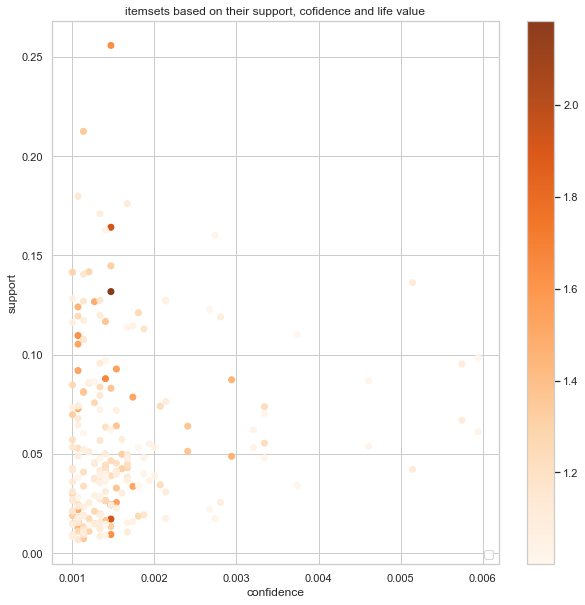

In [248]:
# generating scatter plot
plt.scatter(x=rules1.support, y=rules1.confidence, alpha = .9, c = rules1.lift, cmap = 'Oranges')
cbar = plt.colorbar() 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.xlabel('confidence')
plt.ylabel('support')
plt.title('itemsets based on their support, cofidence and life value')
plt.show()

In [249]:
# Function to convert rules to coordinates.
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: str(antecedent))
    rules['consequent'] = rules['consequents'].apply(lambda consequent: str(consequent))
    rules['rule'] = rules.lift
    return rules[['antecedent','consequent','rule']]

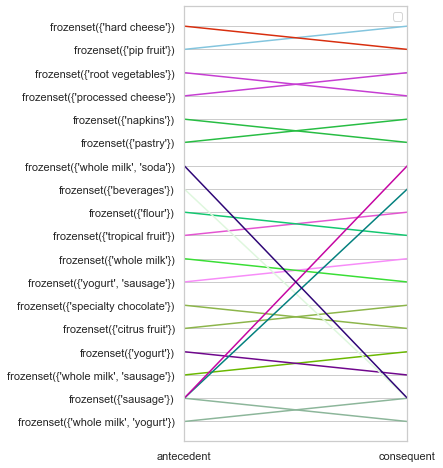

In [250]:
from pandas.plotting import parallel_coordinates
coords = rules_to_coordinates(rules1.head(20))

# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(True)
plt.show()

In [259]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder

In [260]:
#generate frequent itemsets using Apriori algorithm
frequent_itemsets_fp = fpgrowth(trans_data, min_support=0.001, use_colnames=True)

In [261]:
frequent_itemsets_fp = frequent_itemsets_fp.sort_values(['support'], ascending=False)

In [263]:
frequent_itemsets_fp['length'] = frequent_itemsets_fp['itemsets'].apply(lambda x: len(x))

In [265]:
frequent_itemsets_fp.sort_values(by='support', ascending=False).head(10)

,support,itemsets,length
0,0.157923,(whole milk),1
18,0.122101,(other vegetables),1
11,0.110005,(rolls/buns),1
6,0.097106,(soda),1
3,0.085879,(yogurt),1
26,0.069572,(root vegetables),1
20,0.067767,(tropical fruit),1
37,0.060683,(bottled water),1
4,0.060349,(sausage),1
63,0.053131,(citrus fruit),1


In [267]:
frequent_itemsets_fp[frequent_itemsets_fp['length'] >= 2].head(20)

,support,itemsets,length
326,0.014837,"(other vegetables, whole milk)",2
218,0.013968,"(rolls/buns, whole milk)",2
187,0.011629,"(whole milk, soda)",2
168,0.011161,"(whole milk, yogurt)",2
219,0.010559,"(other vegetables, rolls/buns)",2
...,...,...,...
382,0.006616,"(whole milk, pip fruit)",2
149,0.006483,"(whole milk, pastry)",2
413,0.006349,"(whole milk, shopping bags)",2
347,0.006282,"(other vegetables, tropical fruit)",2


In [268]:
# Generating association rules
from mlxtend.frequent_patterns import association_rules
rules_fp = association_rules(frequent_itemsets_fp, metric='lift', min_threshold=1)
rules_fp.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
1,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
2,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508
3,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587
4,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146


In [269]:
rules_fp.shape

(240, 10)

In [270]:
rules_fp= rules_fp.sort_values(by='lift', ascending=False)

In [271]:
rules1_fp = rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

In [272]:
rules1_fp.shape

(240, 5)

In [273]:
rules1_fp.head()

,antecedents,consequents,support,confidence,lift
86,"(whole milk, yogurt)",(sausage),0.001470,0.131737,2.182917
91,(sausage),"(whole milk, yogurt)",0.001470,0.024363,2.182917
87,"(whole milk, sausage)",(yogurt),0.001470,0.164179,1.911760
90,(yogurt),"(whole milk, sausage)",0.001470,0.017121,1.911760
106,(specialty chocolate),(citrus fruit),0.001403,0.087866,1.653762


C:\Users\anrse\AppData\Local\Temp\ipykernel_6380\2402328161.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


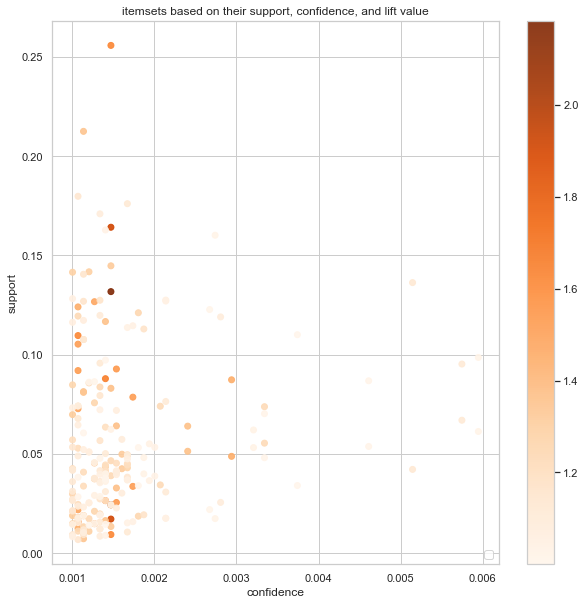

In [274]:
# Generating scatter plot
plt.scatter(x=rules1_fp.support, y=rules1_fp.confidence, alpha=0.9, c=rules1.lift, cmap='Oranges')
cbar = plt.colorbar()
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.xlabel('confidence')
plt.ylabel('support')
plt.title('itemsets based on their support, confidence, and lift value')
plt.show()

In [277]:
def rules_to_coordinates(rules):
    rules_fp['antecedent'] = rules_fp['antecedents'].apply(lambda antecedent: str(antecedent))
    rules_fp['consequent'] = rules_fp['consequents'].apply(lambda consequent: str(consequent))
    rules_fp['rule'] = rules_fp.lift
    return rules_fp[['antecedent', 'consequent', 'rule']]

from pandas.plotting import parallel_coordinates
coords = rules_to_coordinates(rules1_fp.head(20))

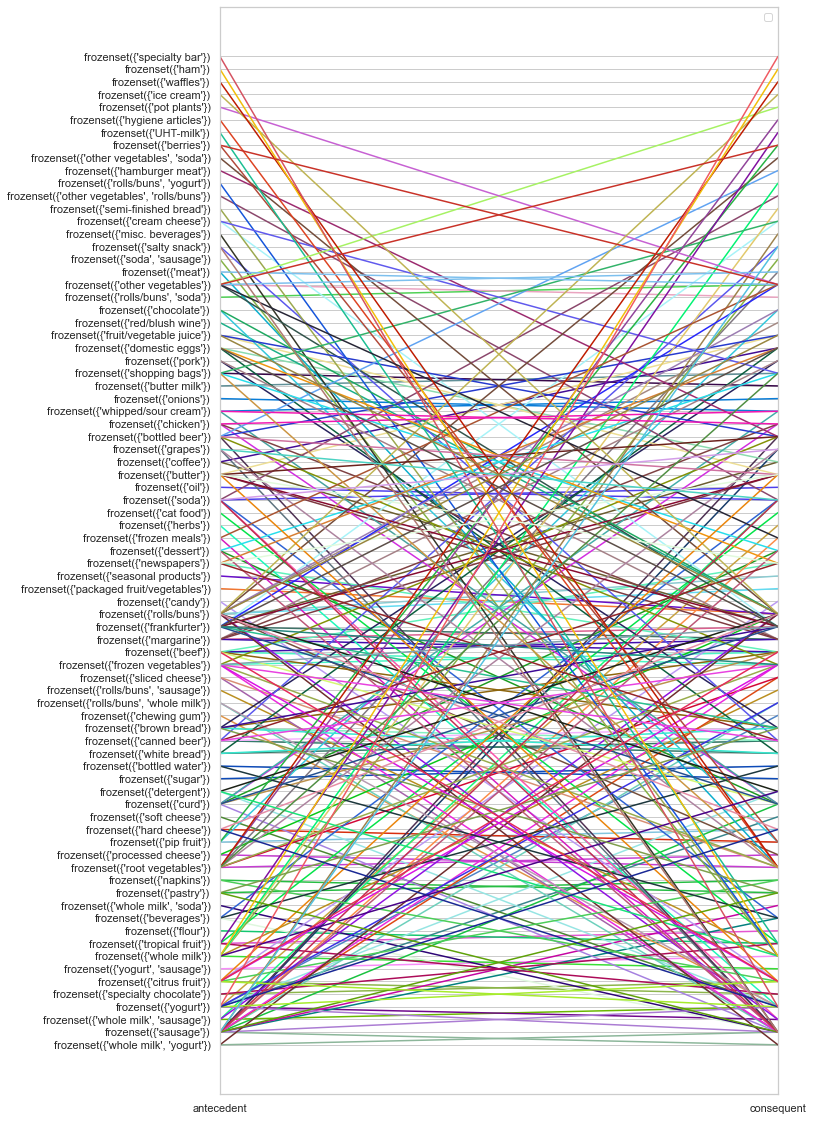

In [280]:
# Generate parallel coordinates plot
plt.figure(figsize=(10, 20))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(True)
plt.show()

# Part III. Dashboard

# Conclusions

This project has allowed me to further appreciate the power and potential of the profession of Data Science and Data Analytics. Through the application of advanced techniques and tools, I was able to observe how technology can be used for good, especially in the development of product and service recommendation systems for companies.

Data analytics gives us the opportunity to understand customer behavior better and use that information to provide personalized recommendations. In this project, I was able to explore how recommendation algorithms can take advantage of customers' purchasing practices to identify patterns and preferences, which in turn enables relevant suggestions and increases customer satisfaction.

This ability to generate accurate and relevant recommendations has a direct impact on the user experience and companies performances and can influence people's purchasing decisions. By using the information collected in an ethical and responsible way, personalized options can be offered that adapt to the individual needs of customers, improving their experience and generating value for both them and companies.

In summary, this project has given me a clearer vision of the positive impact that the profession of Data Science and Data Analytics can have. By using technology responsibly and ethically, we can challenge the power of data to create innovative solutions, like recommender systems, that improve people's lives and create real value in the business world at the same time the companies can obtain valuable insights and make informed decisions that can optimize processes, improve efficiency and contribute to the growth and their development in the industry.

Now, personally during the development of this data analytics project, I faced various challenges and difficulties that tested my skills and perseverance. I worked with three semi-independent datasets related to the 'Book Crossing' dataset, all of which had specific features. Although these data sets complemented each other, it was like running three different projects at the same time.

This project represented a significant learning curve, as I was forced to acquire new knowledge and deal with unfamiliar concepts and techniques. I spent many hours researching and experimenting, using a trial and error approach to find suitable solutions. However, I must admit that many of the options i wanted to show on this project and to achieve the proposed objectives had to be abandoned on the way due to recurring errors, sometimes without understanding the exact cause of it. 
I found this project to be exceptionally complex for one person, especially since my work equipment, in this case my computer, often did not meet the necessary requirements to carry out the project efficiently. The constant need to reboot the computer resulted in lost time and productivity, which negatively affected my ability to keep moving forward.

Despite having invested my greatest effort and dedication in this project, I recognize that it doesn't represent my best work. The circumstances and technical limitations that I faced influenced the results obtained and my performance in general. However, I consider that this project has been a valuable learning experience and a personal challenge that has allowed me to develop skills in the field of data analytics.

In conclusion, this data analytics project on the 'Book Crossing' dataset has given me the opportunity to face the complexity of working with multiple datasets and to overcome technical difficulties. Although the path was fill with obstacles, I am proud to have persevered and achieved significant results despite the limitations. This experience has shown me the importance of having adequate resources and a solid team to face projects of this magnitude in the future.

# References

1. Library, A.L.A. (n.d.). LibGuides: ISBN and ISSN Systems: General Information and Resources. [online] libguides.ala.org. Available at: https://libguides.ala.org/isbn-issn#:~:text=The%20International%20Standard%20Book%20Number. [Accessed 23 May. 2023].
2. www2.informatik.uni-freiburg.de. (n.d.). Book-Crossing Dataset. [online] Available at: http://www2.informatik.uni-freiburg.de/~cziegler/BX/.[Accessed 16 May. 2023].
3. Dey, V. (2021). Collaborative Filtering Vs Content-Based Filtering for Recommender Systems. [online] Analytics India Magazine. Available at: https://analyticsindiamag.com/collaborative-filtering-vs-content-based-filtering-for-recommender-systems/. [Accessed 26 May. 2023].
4. Darshan M (2022). What is cosine similarity and how is it used in machine learning? [online] Analytics India Magazine. Available at: https://analyticsindiamag.com/cosine-similarity-in-machine-learning/#:~:text=Cosine%20similarity%20in%20the%20recommendation. [Accessed 26 May. 2023].
7. Rackaitis, T. (2019). Evaluating Recommender Systems: Root Means Squared Error or Mean Absolute Error? [online] Medium. Available at: https://towardsdatascience.com/evaluating-recommender-systems-root-means-squared-error-or-mean-absolute-error-1744abc2beac.[Accessed 27 May. 2023].